In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [2]:
from scipy import stats

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Steps:
<b> 1- Proplem and Explore Data with `pandas` `numpy` </b>\
<b> 2 - [Exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)     **(EDA)**</b>\
<b> 3 - [Feature Engineering :](https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10)</b>
   * imputation
   * Handling Outliers
   * Log Transform
   * encoding
   * Scaling
   * Normalization 
   * Standardization.
   
<b>4 - </b>

## `Proplem`:
**Accoring to** <b> [Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/description) </b>\
the `problem` we work for it is:\
House Prices - Advanced Regression Techniques\
Predict sales prices and practice feature engineering, RFs, and gradient boosting

## `Explore Data`:

In [4]:
df = pd.read_csv('file/train.csv')

In [5]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [6]:
df.value_counts()

Series([], dtype: int64)

In [7]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df[:1]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  

[1 rows x 81 columns]

In [10]:
df.iloc[[2],[3]]

LotFrontage
2         68.0

In [11]:
df.loc[[5],'LandContour']

5    Lvl
Name: LandContour, dtype: object

In [12]:
df.shape

(1460, 81)

In [13]:
df.index

RangeIndex(start=0, stop=1460, step=1)

In [14]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
df.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [16]:
df['SalePrice'].sum()

264144946

In [17]:
df['SalePrice'].cumsum()

0          208500
1          390000
2          613500
3          753500
4         1003500
          ...    
1455    263378821
1456    263588821
1457    263855321
1458    263997446
1459    264144946
Name: SalePrice, Length: 1460, dtype: int64

In [18]:
df['SalePrice'].min(), df['SalePrice'].max(), df['SalePrice'].min()/df['SalePrice'].max()

(34900, 755000, 0.04622516556291391)

In [19]:
df['SalePrice'].idxmax(),  df['SalePrice'].idxmin()

(691, 495)

**Date yy/mm/dd**

In [20]:
df['YearBuilt'].min(),  df['YearBuilt'].max()

(1872, 2010)

In [21]:
df.loc[[10], 'YearBuilt']

10    1965
Name: YearBuilt, dtype: int64

In [22]:
df['YearBuilt'].idxmin() , df['YearBuilt'].idxmax()

(1349, 378)

In [23]:
df.iloc[1349]

Id                 1350
MSSubClass           70
MSZoning             RM
LotFrontage        50.0
LotArea            5250
                  ...  
MoSold               12
YrSold             2008
SaleType             WD
SaleCondition    Normal
SalePrice        122000
Name: 1349, Length: 81, dtype: object

In [24]:
df.iloc[495]['YearBuilt'], df.iloc[691]['YearBuilt']

(1920, 1994)

In [25]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

WonderFull Lets

# Numpy

In [26]:
a = np.array([1,2,3])

In [27]:
a[1]

2

In [28]:
b = np.array([(1.5,2,3), (4,5,6)], dtype = float)

## Steps:
<b> 1- Proplem and Explore Data with `pandas` `numpy` **✔️**</b>\
<b> 2 - [Exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)     **(EDA)**</b>\
<b> 3 - [Feature Engineering :](https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10)</b>
   * imputation
   * Handling Outliers
   * Log Transform
   * encoding
   * Scaling
   * Normalization 
   * Standardization.
   
<b>4 - </b>

# 2 - EDA

In [29]:
#  f, ax = plt.subplots(figsize=(5,6))
sns.set() 

In [30]:
corr = df.corr()
corr.head()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id           1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass   0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea     -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual -0.028365    0.032628     0.251646  0.105806     1.000000   

             OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id              0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass     -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage    -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea        -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual    -0.091932   0.572323      0.550684    0.411876    0.239666   

             ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id           ...   -0.029643    -0.000477       0.002889  -0.046635   
MSSubClass   ...   -0.012579    -0.006100      -0.012037  -0.043825   
LotFrontage  ...    0.088521     0.151972       0.010700   0.070029   
LotArea      ...    0.171698     0.084774      -0.018340   0.020423   
OverallQual  ...    0.238923     0.308819      -0.113937   0.030371   

             ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  SalePrice  
Id              0.001330  0.057044 -0.006242  0.021172  0.000712  -0.021917  
MSSubClass     -0.026030  0.008283 -0.007683 -0.013585 -0.021407  -0.084284  
LotFrontage     0.041383  0.206167  0.003368  0.011200  0.007450   0.351799  
LotArea         0.043160  0.077672  0.038068  0.001205 -0.014261   0.263843  
OverallQual     0.064886  0.065166 -0.031406  0.070815 -0.027347   0.790982  

[5 rows x 38 columns]

In [31]:
df[corr.index].values.T
# df[cols].values.T

array([[1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 1.45800e+03,
        1.45900e+03, 1.46000e+03],
       [6.00000e+01, 2.00000e+01, 6.00000e+01, ..., 7.00000e+01,
        2.00000e+01, 2.00000e+01],
       [6.50000e+01, 8.00000e+01, 6.80000e+01, ..., 6.60000e+01,
        6.80000e+01, 7.50000e+01],
       ...,
       [2.00000e+00, 5.00000e+00, 9.00000e+00, ..., 5.00000e+00,
        4.00000e+00, 6.00000e+00],
       [2.00800e+03, 2.00700e+03, 2.00800e+03, ..., 2.01000e+03,
        2.01000e+03, 2.00800e+03],
       [2.08500e+05, 1.81500e+05, 2.23500e+05, ..., 2.66500e+05,
        1.42125e+05, 1.47500e+05]])

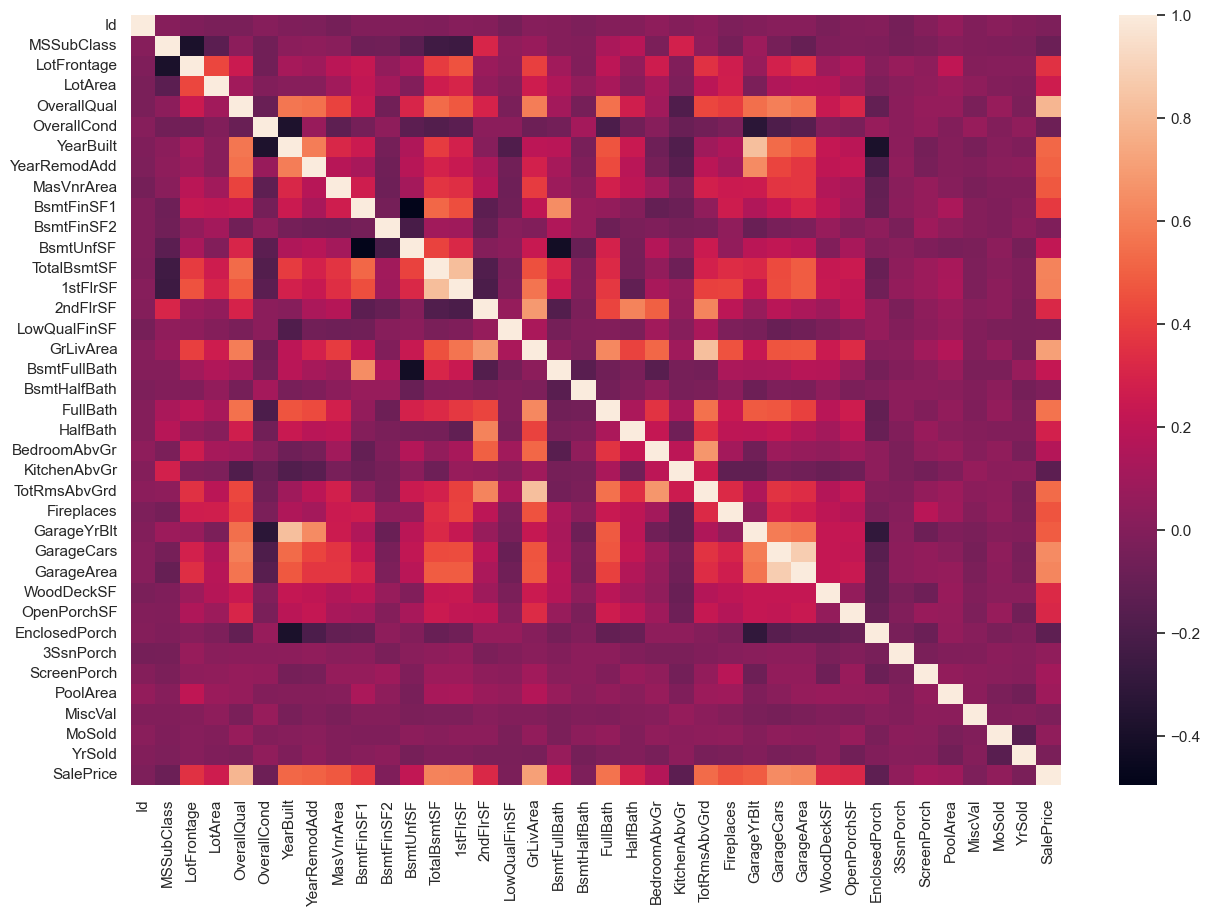

In [32]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr,fmt=".1f");

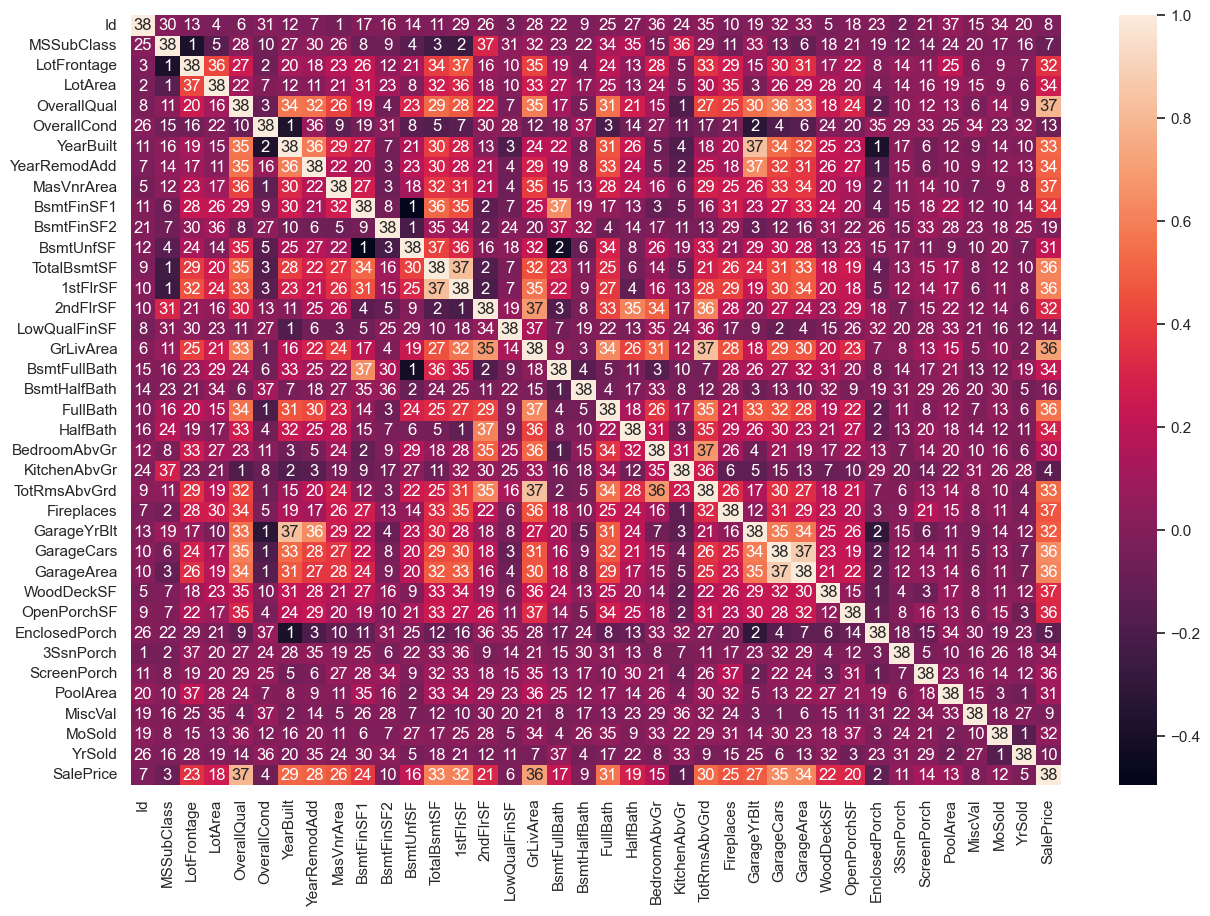

In [33]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr,annot=corr.rank(axis="columns"));

<AxesSubplot:>

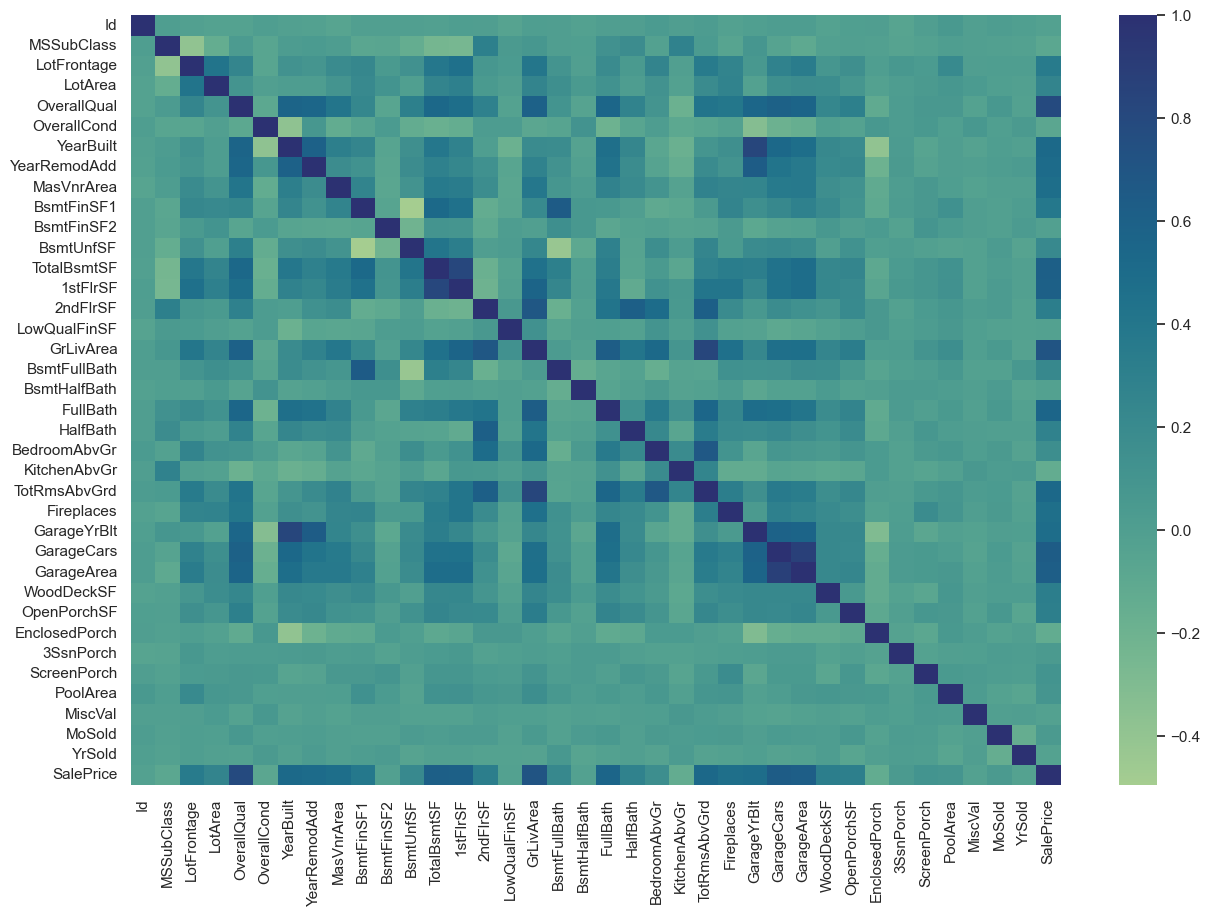

In [34]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, cmap="crest")

In [35]:
# sns.pairplot(df, hue="SalePrice")

In [36]:
sns.set_theme(style="ticks");

In [37]:
df[['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd']]

GrLivArea  GarageCars  GarageArea  TotalBsmtSF  FullBath  TotRmsAbvGrd
0          1710           2         548          856         2             8
1          1262           2         460         1262         2             6
2          1786           2         608          920         2             6
3          1717           3         642          756         1             7
4          2198           3         836         1145         2             9
...         ...         ...         ...          ...       ...           ...
1455       1647           2         460          953         2             7
1456       2073           2         500         1542         2             7
1457       2340           1         252         1152         2             9
1458       1078           1         240         1078         1             5
1459       1256           1         276         1256         1             6

[1460 rows x 6 columns]

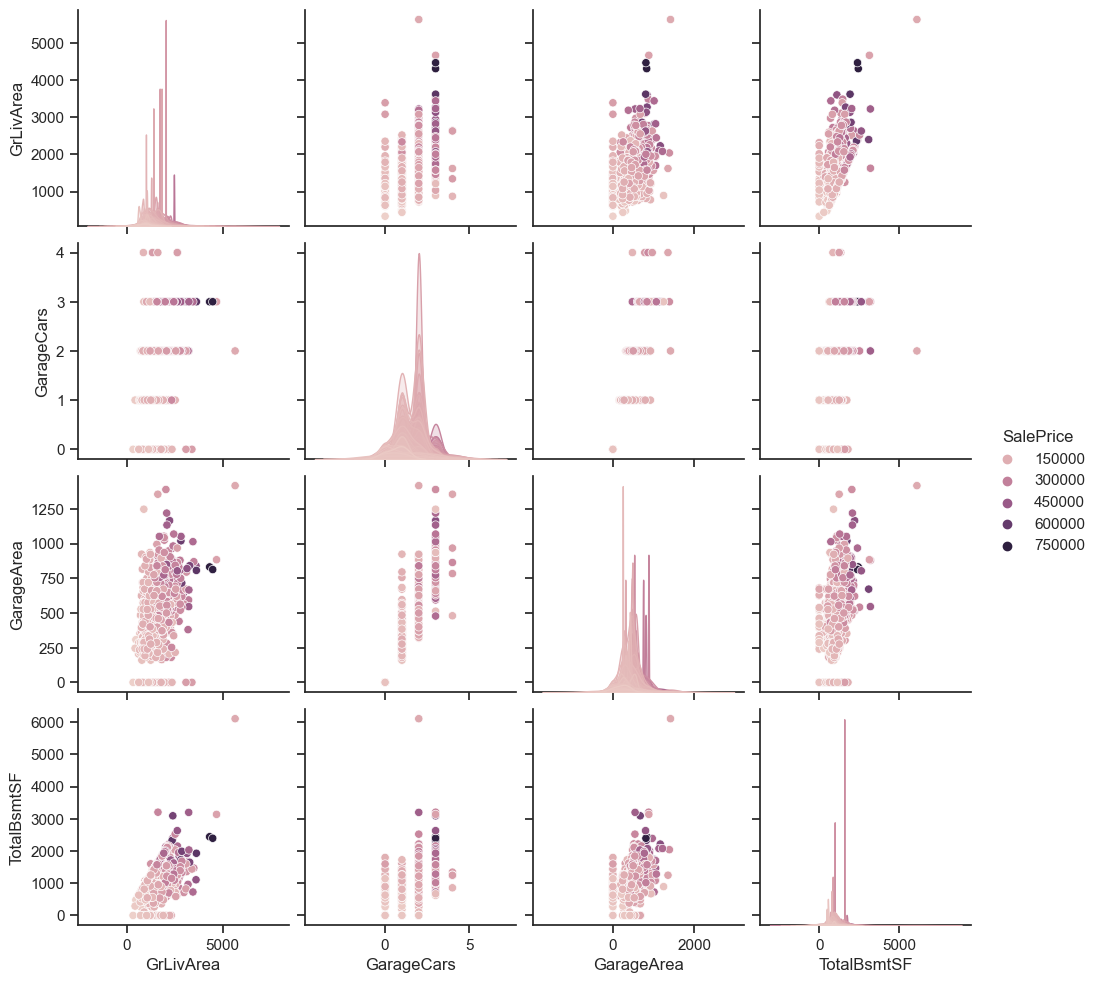

In [38]:
sns.pairplot(df[['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF','SalePrice']],hue='SalePrice');

In [39]:
#Get the most max n of Column that correlation
k = 10 #
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index

In [40]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [41]:
cm = np.corrcoef(df[cols].values.T)

In [42]:
df[cols]

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        208500            7       1710           2         548          856   
1        181500            6       1262           2         460         1262   
2        223500            7       1786           2         608          920   
3        140000            7       1717           3         642          756   
4        250000            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455     175000            6       1647           2         460          953   
1456     210000            6       2073           2         500         1542   
1457     266500            7       2340           1         252         1152   
1458     142125            5       1078           1         240         1078   
1459     147500            5       1256           1         276         1256   

      1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  
0          856         2             8       2003  
1         1262         2             6       1976  
2          920         2             6       2001  
3          961         1             7       1915  
4         1145         2             9       2000  
...        ...       ...           ...        ...  
1455       953         2             7       1999  
1456      2073         2             7       1978  
1457      1188         2             9       1941  
1458      1078         1             5       1950  
1459      1256         1             6       1965  

[1460 rows x 10 columns]

In [43]:
sns.set(font_scale=1.25)

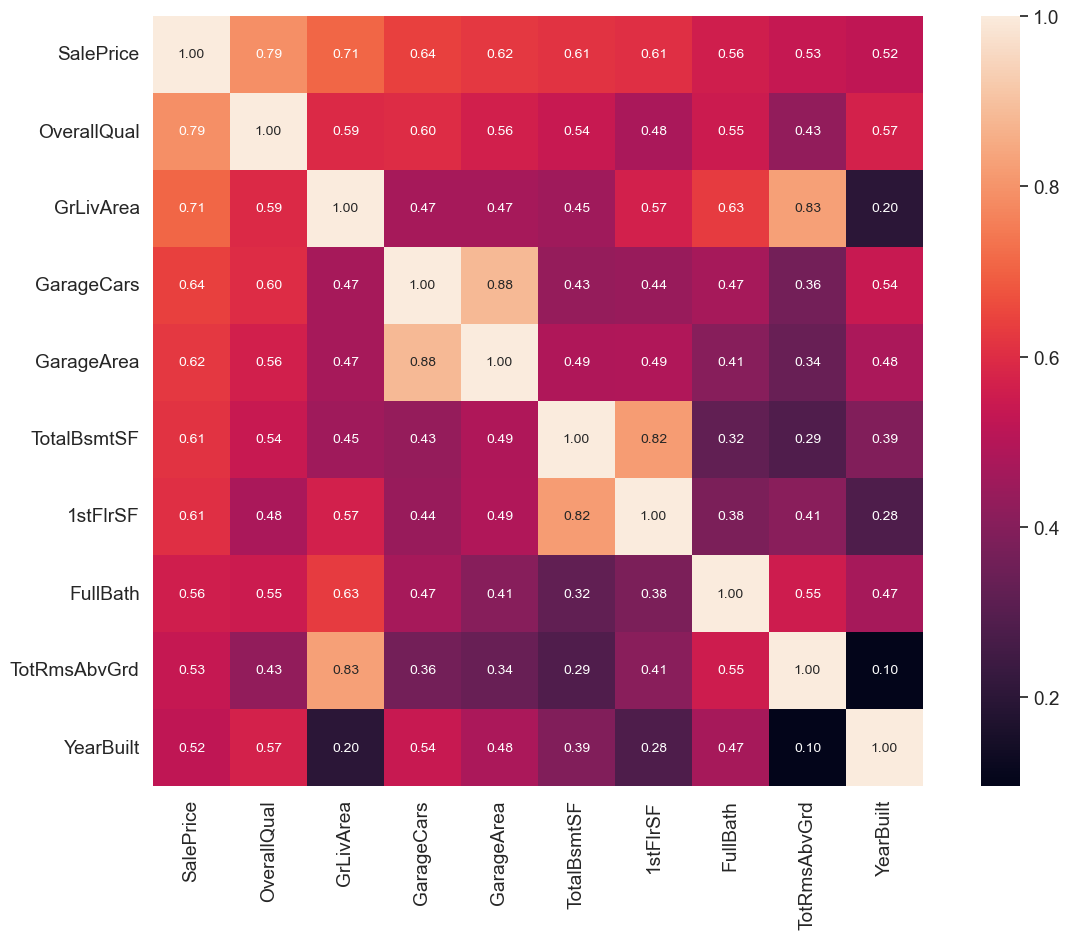

In [44]:
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

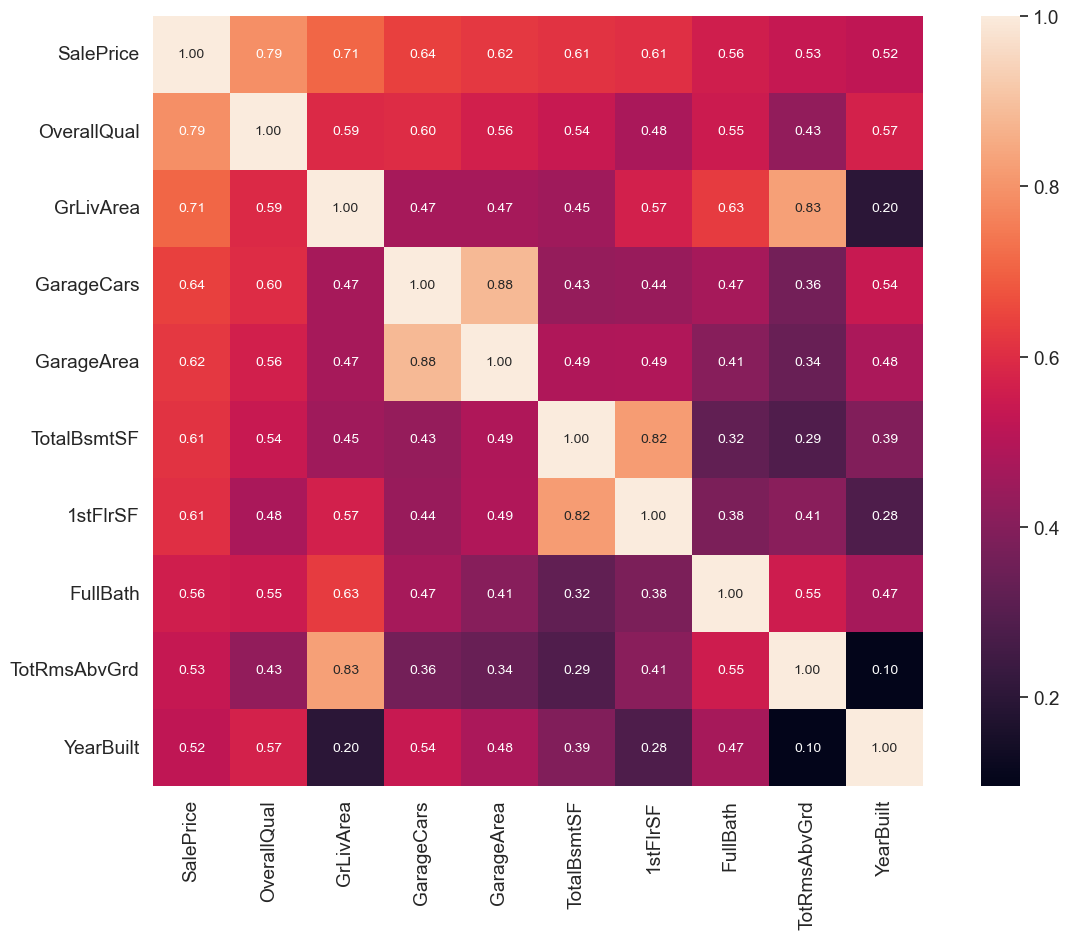

In [45]:
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

***Ohh Ali it look that same above but numpy is faster than pandas dataframe***


### The Most Important Variable in Data set

In [46]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [47]:
df[cols]

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        208500            7       1710           2         548          856   
1        181500            6       1262           2         460         1262   
2        223500            7       1786           2         608          920   
3        140000            7       1717           3         642          756   
4        250000            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455     175000            6       1647           2         460          953   
1456     210000            6       2073           2         500         1542   
1457     266500            7       2340           1         252         1152   
1458     142125            5       1078           1         240         1078   
1459     147500            5       1256           1         276         1256   

      1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  
0          856         2             8       2003  
1         1262         2             6       1976  
2          920         2             6       2001  
3          961         1             7       1915  
4         1145         2             9       2000  
...        ...       ...           ...        ...  
1455       953         2             7       1999  
1456      2073         2             7       1978  
1457      1188         2             9       1941  
1458      1078         1             5       1950  
1459      1256         1             6       1965  

[1460 rows x 10 columns]

In [48]:
cols[:5], cols[5:] 

(Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object'),
 Index(['TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'], dtype='object'))

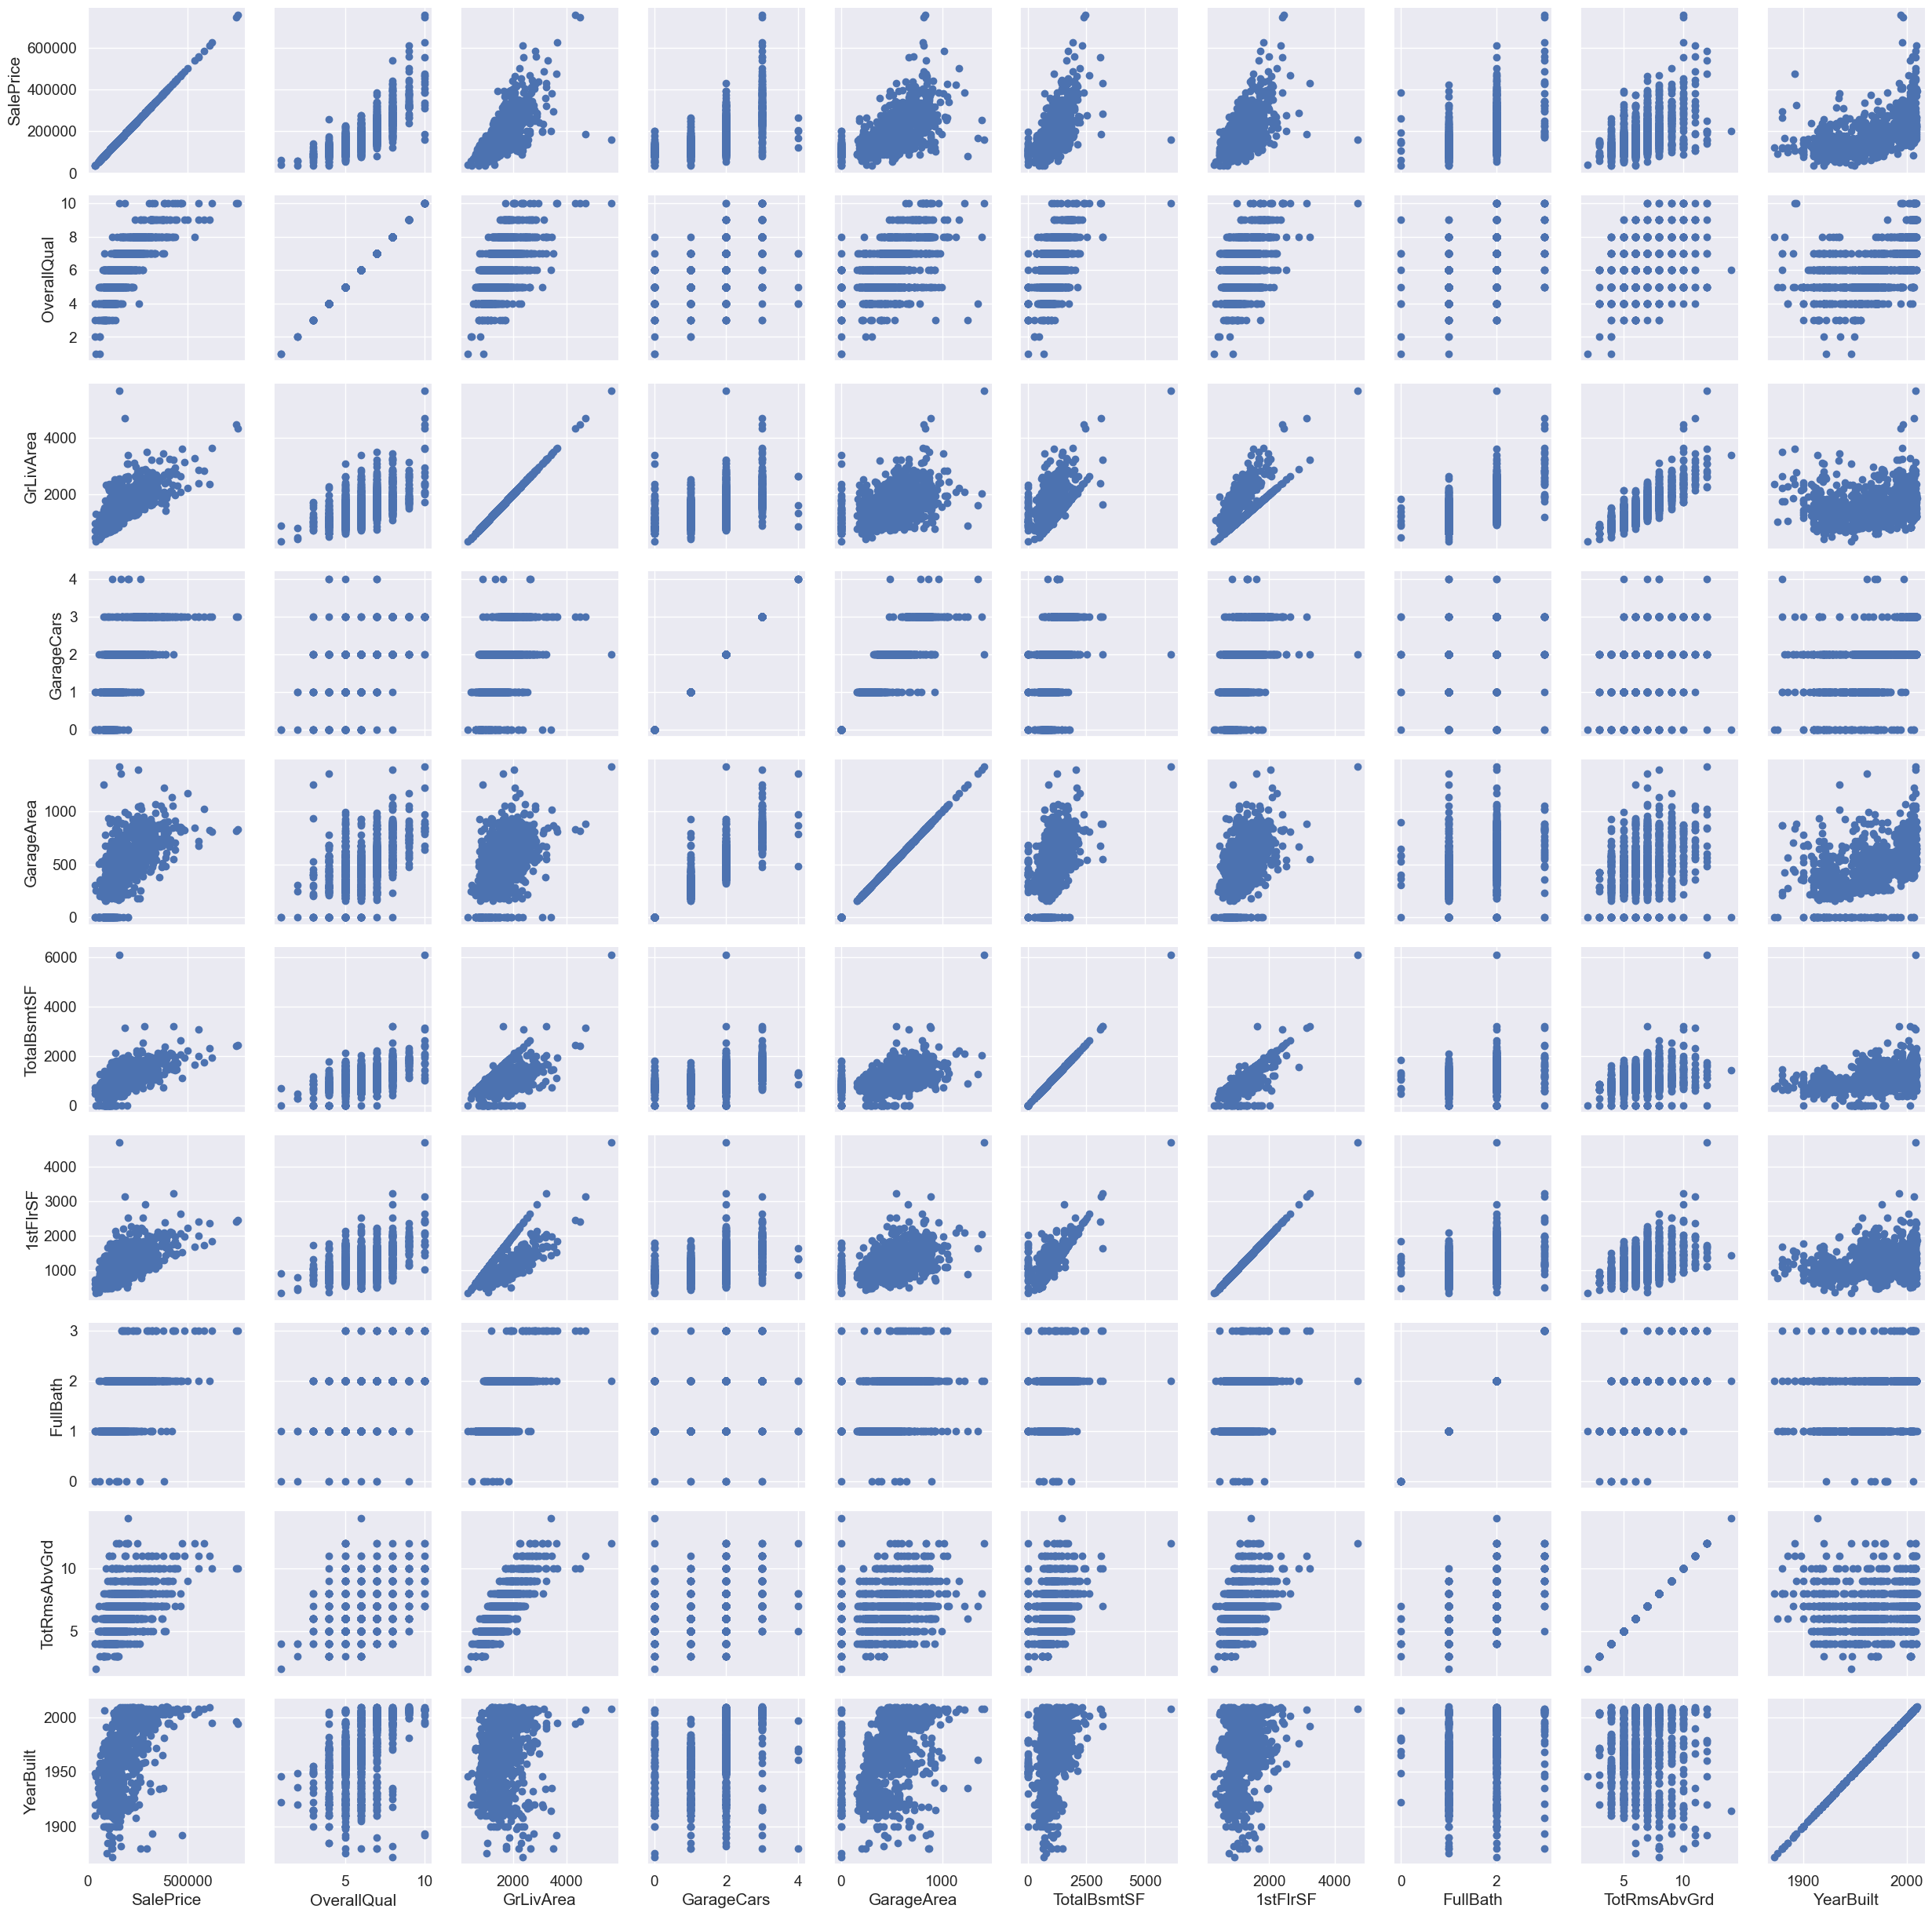

In [49]:
sns.PairGrid(df[cols]).map(plt.scatter);

Ok Ali Now:\
ابدا حلل البيانات دي لانها أكتر بيانات متبطة بالمودل\
SalePrice
OverallQual, 
'GrLivArea', 
'GarageCars', 
'GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'


In [50]:
print(cols.values)

['SalePrice' 'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt']


In [51]:
df[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalePrice     1460 non-null   int64
 1   OverallQual   1460 non-null   int64
 2   GrLivArea     1460 non-null   int64
 3   GarageCars    1460 non-null   int64
 4   GarageArea    1460 non-null   int64
 5   TotalBsmtSF   1460 non-null   int64
 6   1stFlrSF      1460 non-null   int64
 7   FullBath      1460 non-null   int64
 8   TotRmsAbvGrd  1460 non-null   int64
 9   YearBuilt     1460 non-null   int64
dtypes: int64(10)
memory usage: 114.2 KB


## EDA: OverallQual 

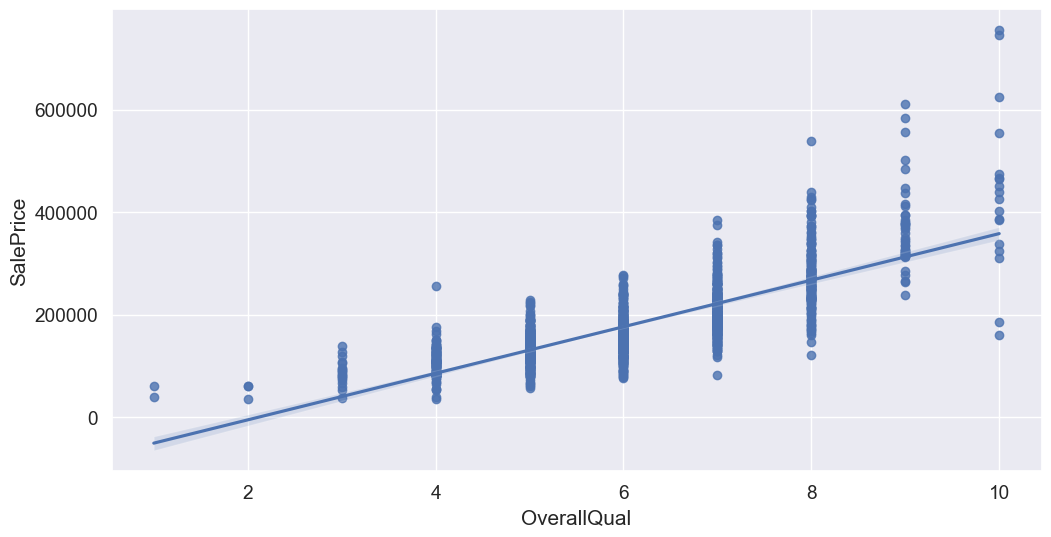

In [52]:
f, ax = plt.subplots(figsize=(12,6))
sns.regplot(x="OverallQual",
y="SalePrice",
data=df);

In [53]:
sns.set_style("whitegrid")
sns.set_palette("husl",3)

In [54]:
sns.set_context("notebook", #Set context to "notebook",
font_scale=1.5, #Scale font elements and
rc={"lines.linewidth":2.5})

In [55]:
# sns.set()

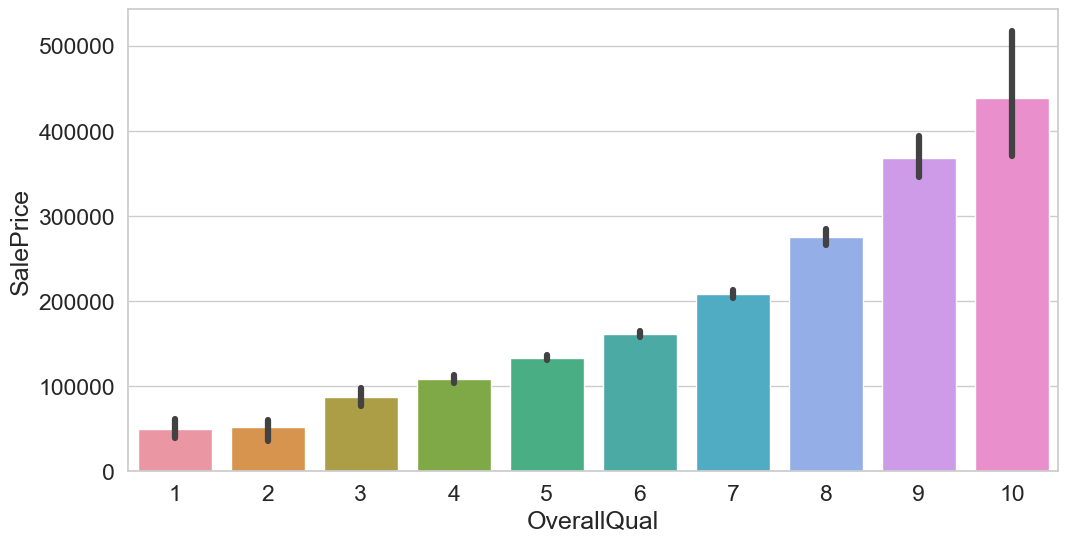

In [56]:
f, ax = plt.subplots(figsize=(12,6))
sns.barplot(x="OverallQual", #Show point estimates and
y="SalePrice", #confidence intervals with
 #scatterplot glyphs
data=df);

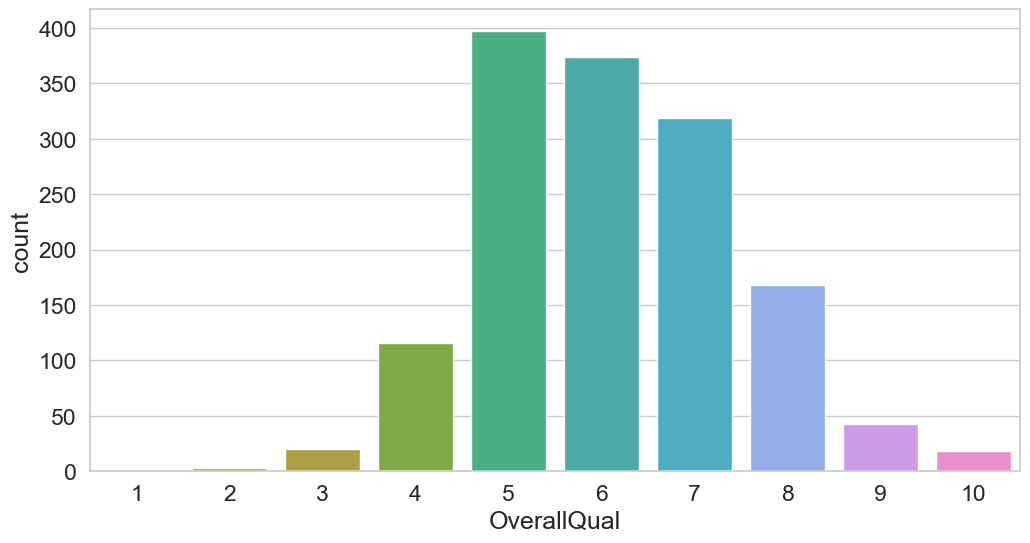

In [57]:
f, ax = plt.subplots(figsize=(12,6))
sns.countplot(x="OverallQual", #Show point estimates and
# y="SalePrice", #confidence intervals with
 #scatterplot glyphs
data=df);

<AxesSubplot:xlabel='OverallQual', ylabel='Density'>

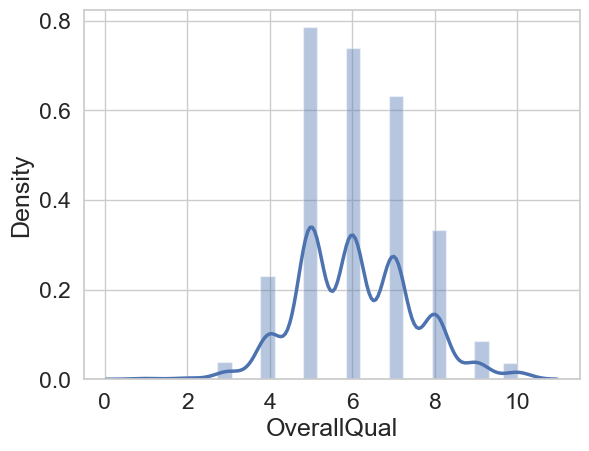

In [58]:
sns.distplot(df.OverallQual, #Plot univariate distribution
kde=True,
color="b")

## EDA: GrLivArea 

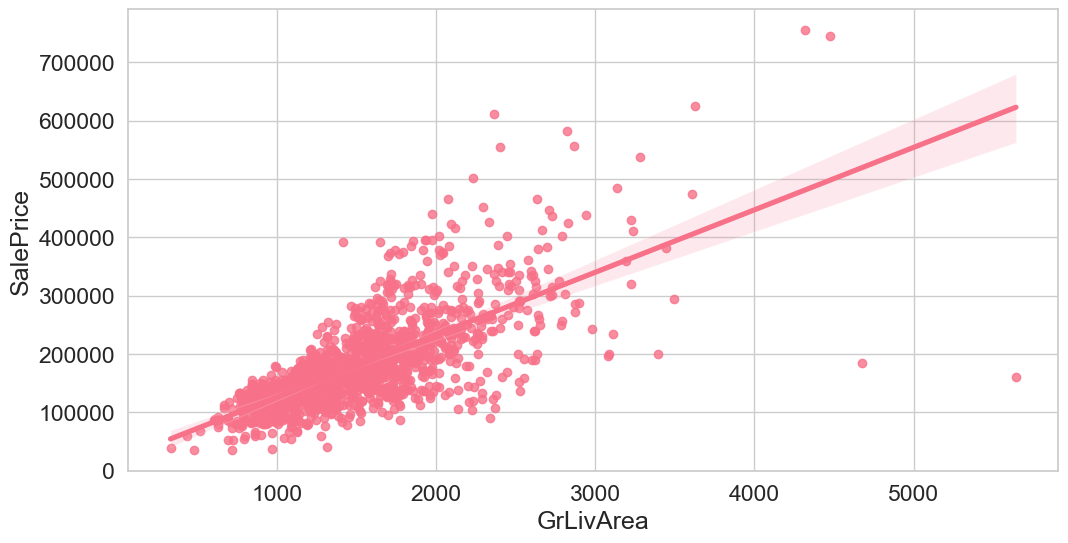

In [59]:
f, ax = plt.subplots(figsize=(12,6))
sns.regplot(x="GrLivArea", #Plot data and a linear regression
y="SalePrice", #model fit
data=df,
ax=ax);

## EDA: GarageCars 

In [60]:
df['GarageCars'].min(), df['GarageCars'].max()

(0, 4)

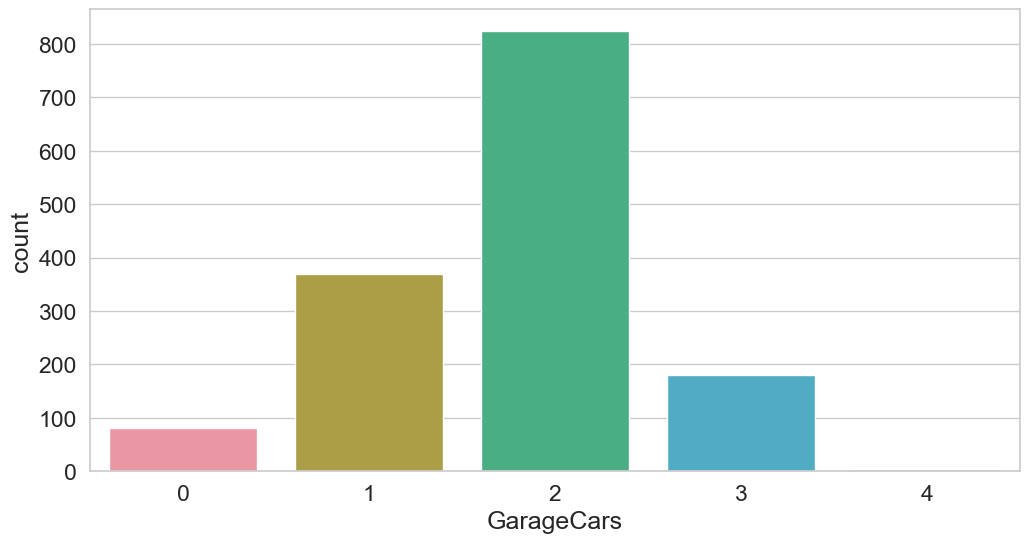

In [61]:
f, ax = plt.subplots(figsize=(12,6))
sns.countplot(x="GarageCars", #Show point estimates and
# y="SalePrice", #confidence intervals with
 #scatterplot glyphs
data=df);

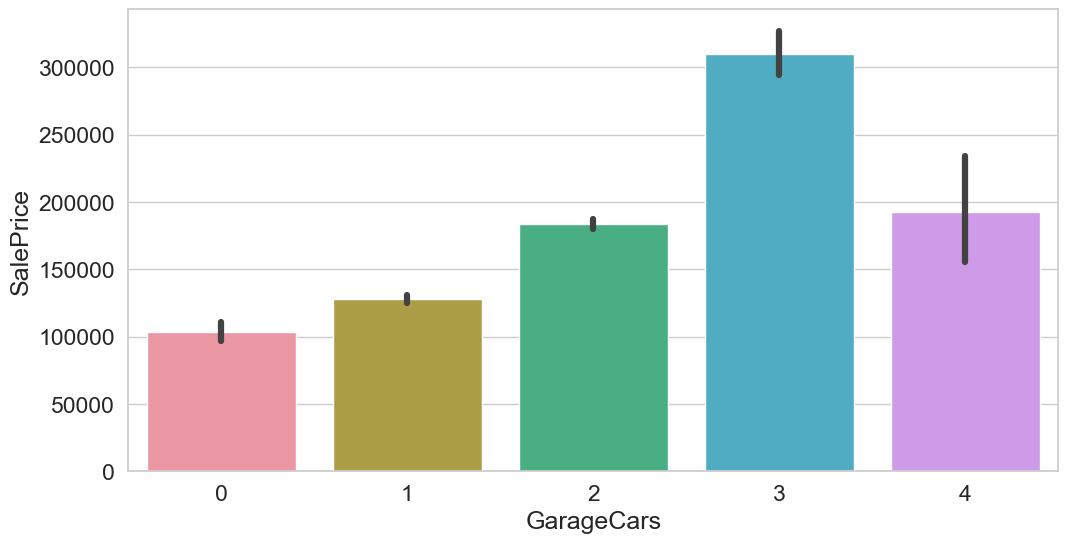

In [62]:
f, ax = plt.subplots(figsize=(12,6))
sns.barplot(x="GarageCars", #Show point estimates and
y="SalePrice", #confidence intervals with
 #scatterplot glyphs
data=df);

## EDA: GarageArea 

In [63]:
df['GarageArea'].min(), df['GarageArea'].max(),

(0, 1418)

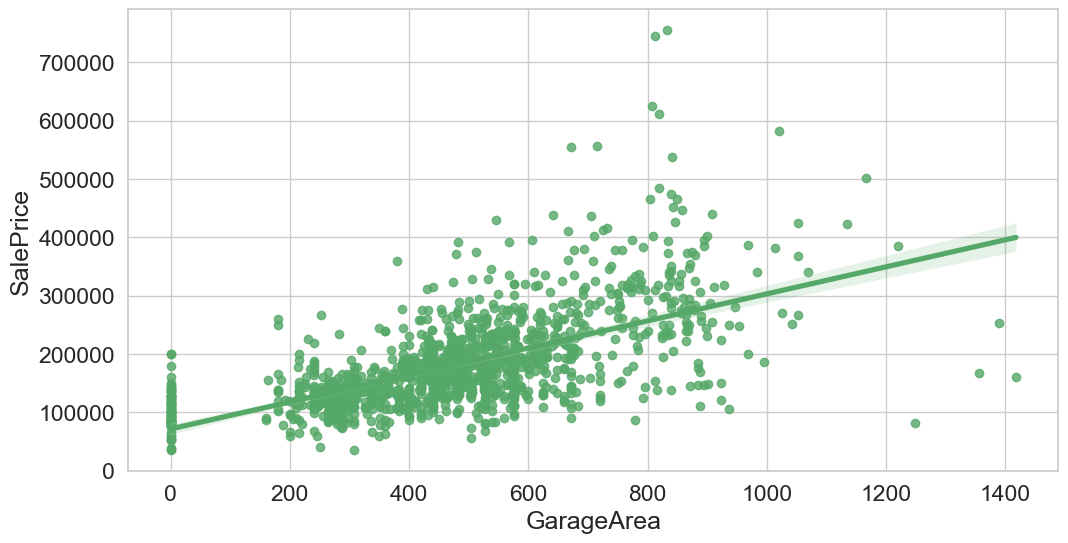

In [64]:
f, ax = plt.subplots(figsize=(12,6))
sns.regplot(x="GarageArea", #Plot data and a linear regression
y="SalePrice", #model fit
data=df,
ax=ax,color='g');

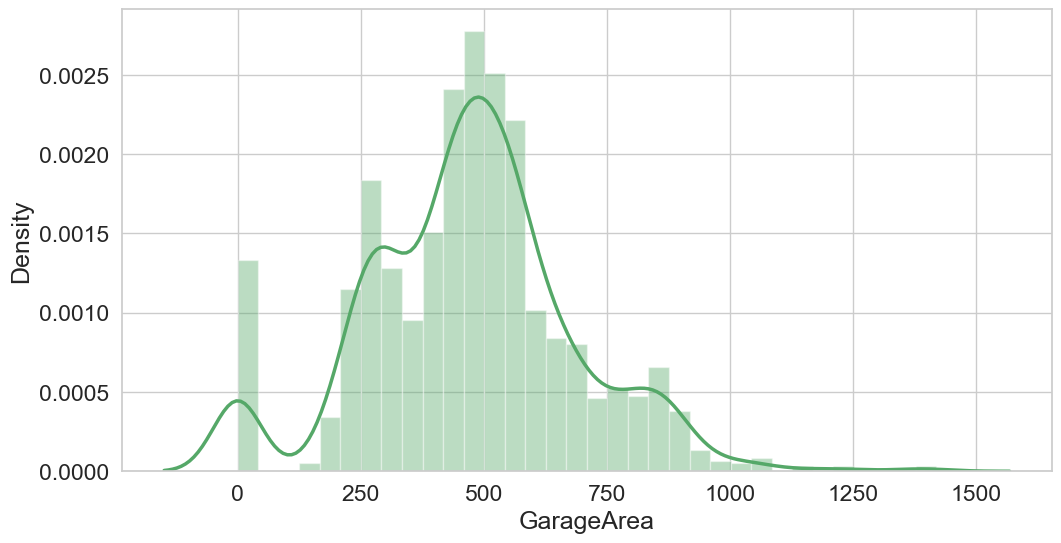

In [65]:
f, ax = plt.subplots(figsize=(12,6))
sns.distplot(df['GarageArea'], #Plot univariate distribution
kde=True,
color="g");

## EDA: TotalBsmtSF 

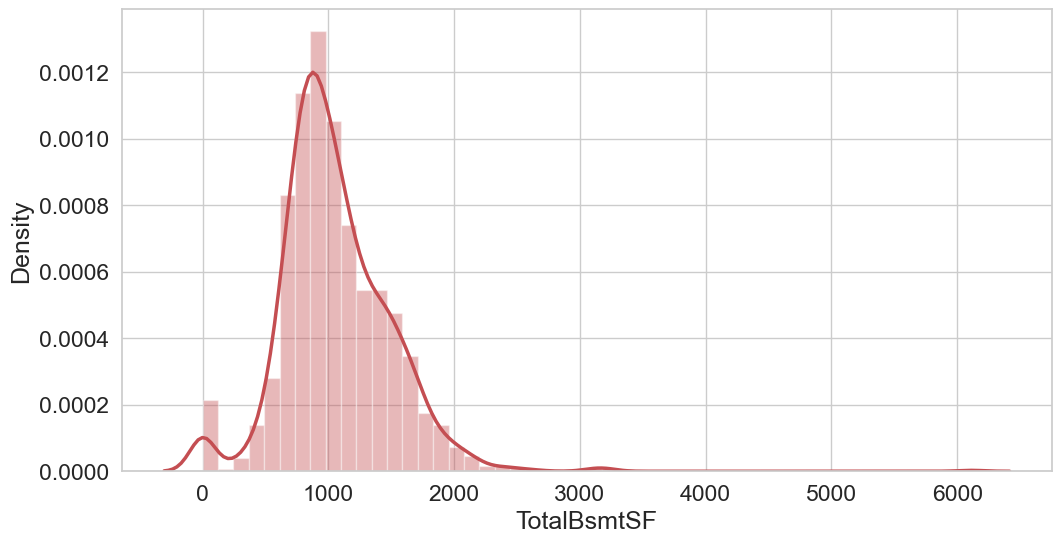

In [66]:
f, ax = plt.subplots(figsize=(12,6))
sns.distplot(df['TotalBsmtSF'], #Plot univariate distribution
kde=True,
color="r");

## EDA: 1stFlrSF 

In [67]:
df['1stFlrSF'].nunique()

753

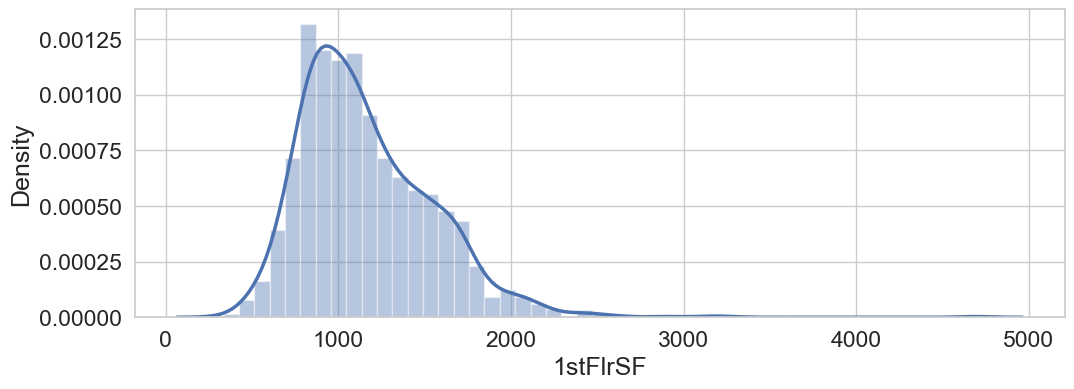

In [68]:
f, ax = plt.subplots(figsize=(12,4))
sns.distplot(df['1stFlrSF'], #Plot univariate distribution
kde=True,
color="b");

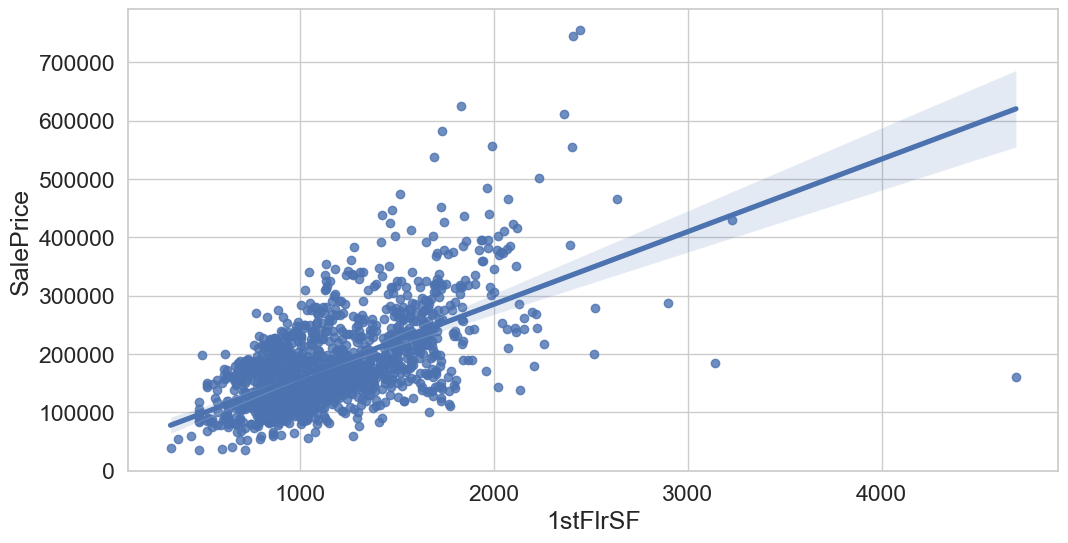

In [69]:
f, ax = plt.subplots(figsize=(12,6))
sns.regplot(x="1stFlrSF", #Plot data and a linear regression
y="SalePrice", #model fit
data=df,
ax=ax,color='b');

## EDA: TotRmsAbvGrd 

In [70]:
df['TotRmsAbvGrd'].min(), df['TotRmsAbvGrd'].max()

(2, 14)

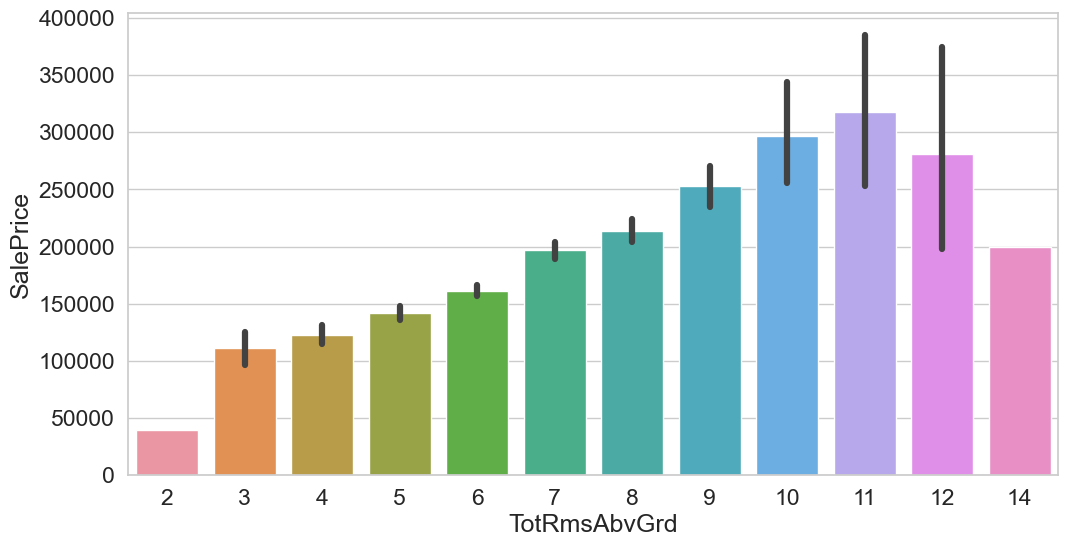

In [71]:
f, ax = plt.subplots(figsize=(12,6))
sns.barplot(x="TotRmsAbvGrd", #Show point estimates and
y="SalePrice", #confidence intervals with
 #scatterplot glyphs
data=df);

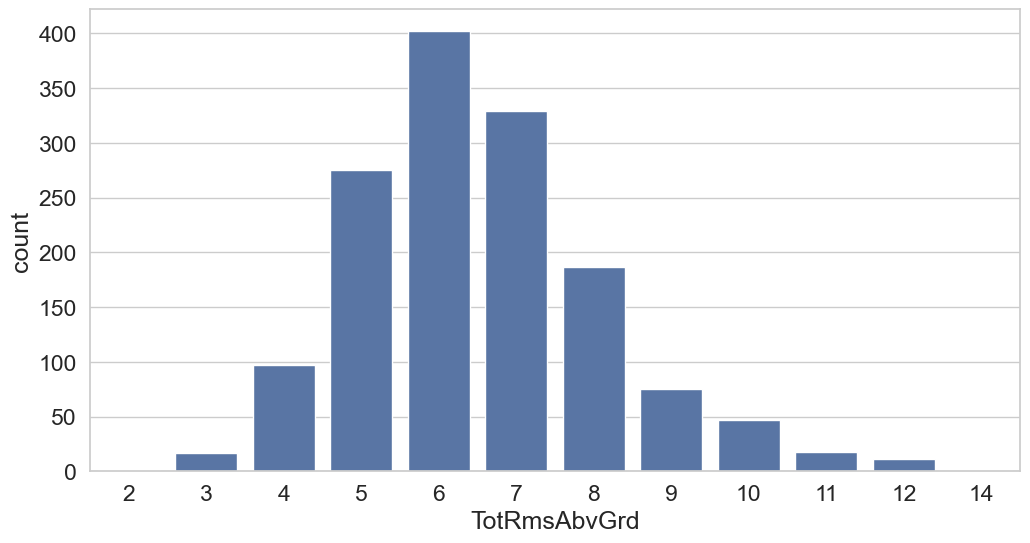

In [72]:
f, ax = plt.subplots(figsize=(12,6))
sns.countplot(x="TotRmsAbvGrd", #Show point estimates and
# y="SalePrice", #confidence intervals with
 #scatterplot glyphs
data=df,color='b');

## EDA: YearBuilt 

In [73]:
df['YearBuilt'].min(), df['YearBuilt'].max(),

(1872, 2010)

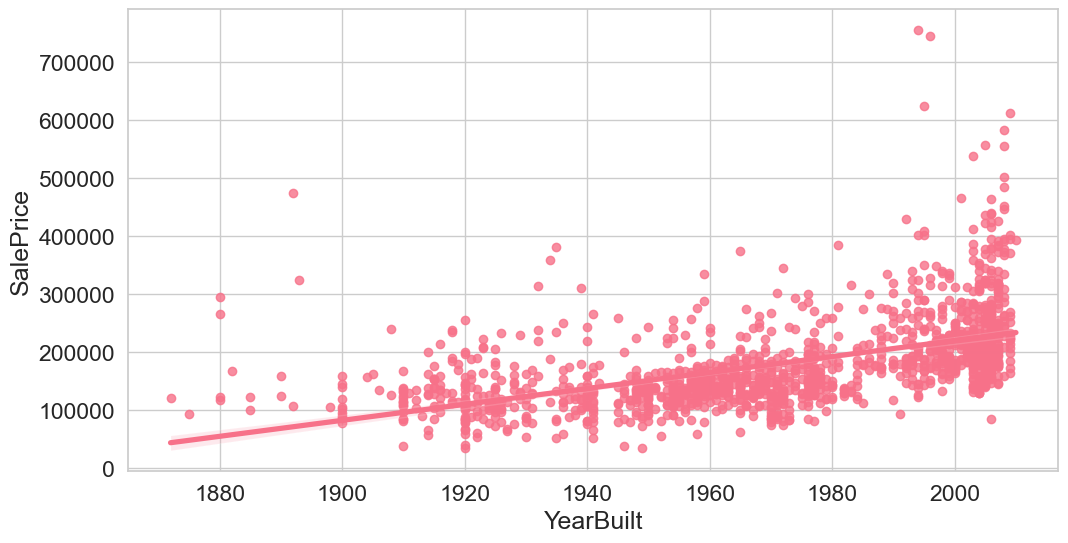

In [74]:
f, ax = plt.subplots(figsize=(12,6))
sns.regplot(x="YearBuilt", #Plot data and a linear regression
y="SalePrice", #model fit
data=df,
ax=ax);

<b> 1- Proplem and Explore Data with `pandas` `numpy` **✔️**</b>\
<b> 2 - [Exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)     **(EDA)** **✔️**</b>\
<b> 3 - [Feature Engineering :](https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10)</b>
   * imputation
   * Handling Outliers
   * Log Transform
   * encoding
   * Scaling
   * Normalization 
   * Standardization.
   
<b>4 - </b>

### 3 - Feature Engineering :

## Imputation

In [75]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [76]:
#missing data
exist = df.count().sort_values(ascending=True)
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False))
missing_data = pd.concat([exist, total, percent], axis=1, keys=['Only Excist','Missing', 'Percent of Missing'])
# missing_data.head(20)

In [77]:
missing_data.head(20)

Only Excist  Missing  Percent of Missing
PoolQC                  7     1453            0.995205
MiscFeature            54     1406            0.963014
Alley                  91     1369            0.937671
Fence                 281     1179            0.807534
FireplaceQu           770      690            0.472603
LotFrontage          1201      259            0.177397
GarageYrBlt          1379       81            0.055479
GarageType           1379       81            0.055479
GarageFinish         1379       81            0.055479
GarageQual           1379       81            0.055479
GarageCond           1379       81            0.055479
BsmtExposure         1422       38            0.026027
BsmtFinType2         1422       38            0.026027
BsmtFinType1         1423       37            0.025342
BsmtCond             1423       37            0.025342
BsmtQual             1423       37            0.025342
MasVnrArea           1452        8            0.005479
MasVnrType           1452        8            0.005479
Electrical           1459        1            0.000685
KitchenQual          1460        0            0.000000

In [78]:
np.nan

nan

In [79]:
import missingno as mno

<AxesSubplot:>

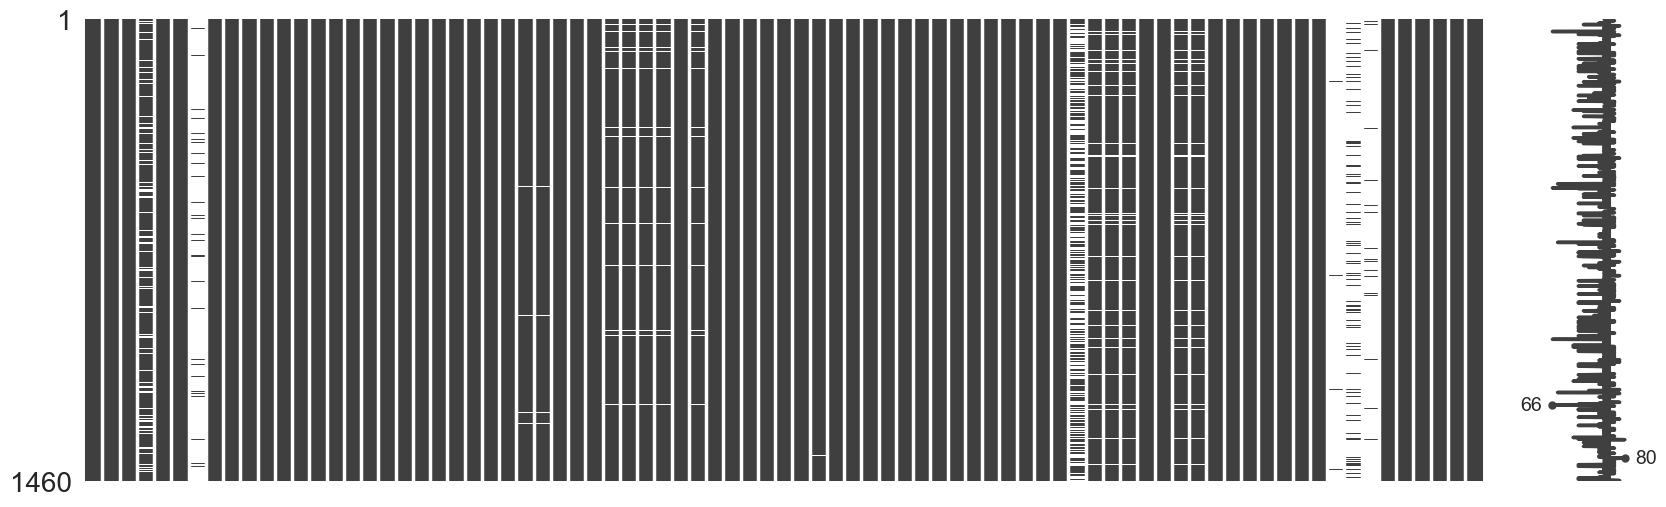

In [80]:
mno.matrix(df, figsize = (20, 6))

In [81]:
df['PoolQC'].nunique() , df['PoolQC'].value_counts()

(3,
 Gd    3
 Ex    2
 Fa    2
 Name: PoolQC, dtype: int64)

In [82]:
df['PoolQC'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: PoolQC
Non-Null Count  Dtype 
--------------  ----- 
7 non-null      object
dtypes: object(1)
memory usage: 11.5+ KB


pool qualaty there many house has no pool

In [83]:
df['PoolQC'] = df['PoolQC'].fillna('NoPool')

In [84]:
df['PoolQC'].nunique() , df['PoolQC'].value_counts()

(4,
 NoPool    1453
 Gd           3
 Ex           2
 Fa           2
 Name: PoolQC, dtype: int64)

In [85]:
df['MiscFeature'].nunique() #, df['MiscFeature'].value_counts()

4

I Think that Funciotn is good

In [86]:
def info(column_name):
    uniq_vale = df[column_name].nunique()
    miss_vale = df[column_name].isna().sum()
    val_val = pd.unique(df[column_name])
    print('\n','\033[1m'+column_name)
    print('\033[0m')
    print(f'Number of Unique value   : {uniq_vale}')
    print(f'Number of Missing value  : {miss_vale}')
    if uniq_vale<20:
        print(f'The Value is : {val_val}')

    

In [87]:
info('MiscFeature')


 MiscFeature

Number of Unique value   : 4
Number of Missing value  : 1406
The Value is : [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [88]:
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [89]:
info('Alley')


 Alley

Number of Unique value   : 2
Number of Missing value  : 1369
The Value is : [nan 'Grvl' 'Pave']


In [90]:
df['Alley'] = df['Alley'].fillna('noalley')

In [91]:
info('Fence')


 Fence

Number of Unique value   : 4
Number of Missing value  : 1179
The Value is : [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [92]:
df['Fence'] = df['Fence'].fillna('nofence')

In [93]:
info('FireplaceQu')


 FireplaceQu

Number of Unique value   : 5
Number of Missing value  : 690
The Value is : [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


In [94]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NoFireplace')

In [95]:
info('LotFrontage')


 LotFrontage

Number of Unique value   : 110
Number of Missing value  : 259


I thout that this feature is most ....hmmmm

In [96]:
info('GarageYrBlt')


 GarageYrBlt

Number of Unique value   : 97
Number of Missing value  : 81


In [97]:
info('GarageType')


 GarageType

Number of Unique value   : 6
Number of Missing value  : 81
The Value is : ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']


In [98]:
df['GarageType'] = df['GarageType'].fillna('NoGarage')

In [99]:
info('GarageFinish')


 GarageFinish

Number of Unique value   : 3
Number of Missing value  : 81
The Value is : ['RFn' 'Unf' 'Fin' nan]


In [100]:
df['GarageFinish'] = df['GarageFinish'].fillna('NoGarage')

In [101]:
info('GarageQual')
info('GarageCond')
info('BsmtExposure')
info('BsmtFinType2')
info('BsmtCond')
info('MasVnrArea')
info('MasVnrType')
info('Electrical')


 GarageQual

Number of Unique value   : 5
Number of Missing value  : 81
The Value is : ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']

 GarageCond

Number of Unique value   : 5
Number of Missing value  : 81
The Value is : ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']

 BsmtExposure

Number of Unique value   : 4
Number of Missing value  : 38
The Value is : ['No' 'Gd' 'Mn' 'Av' nan]

 BsmtFinType2

Number of Unique value   : 6
Number of Missing value  : 38
The Value is : ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']

 BsmtCond

Number of Unique value   : 4
Number of Missing value  : 37
The Value is : ['TA' 'Gd' nan 'Fa' 'Po']

 MasVnrArea

Number of Unique value   : 327
Number of Missing value  : 8

 MasVnrType

Number of Unique value   : 4
Number of Missing value  : 8
The Value is : ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]

 Electrical

Number of Unique value   : 5
Number of Missing value  : 1
The Value is : ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


In [102]:
df['GarageQual'] = df['GarageQual'].fillna('NoGarage')
df['GarageCond'] = df['GarageCond'].fillna('NoGarage')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NoBasement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NoBasement')
df['BsmtCond'] = df['BsmtCond'].fillna('NoBasement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NoBasement')
df['BsmtQual'] = df['BsmtQual'].fillna('NoBasement')
df['MasVnrType'] = df['MasVnrType'].fillna('nomasvnr')

In [103]:
# LotFrontage ,GarageYrBlt, MasVnrArea

In [104]:
missing_data.head(20)

Only Excist  Missing  Percent of Missing
PoolQC                  7     1453            0.995205
MiscFeature            54     1406            0.963014
Alley                  91     1369            0.937671
Fence                 281     1179            0.807534
FireplaceQu           770      690            0.472603
LotFrontage          1201      259            0.177397
GarageYrBlt          1379       81            0.055479
GarageType           1379       81            0.055479
GarageFinish         1379       81            0.055479
GarageQual           1379       81            0.055479
GarageCond           1379       81            0.055479
BsmtExposure         1422       38            0.026027
BsmtFinType2         1422       38            0.026027
BsmtFinType1         1423       37            0.025342
BsmtCond             1423       37            0.025342
BsmtQual             1423       37            0.025342
MasVnrArea           1452        8            0.005479
MasVnrType           1452        8            0.005479
Electrical           1459        1            0.000685
KitchenQual          1460        0            0.000000

In [105]:
#missing data
exist = df.count().sort_values(ascending=True)
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False))
missing_data = pd.concat([exist, total, percent], axis=1, keys=['Only Excist','Missing', 'Percent of Missing'])
missing_data.head(20)

Only Excist  Missing  Percent of Missing
LotFrontage          1201      259            0.177397
GarageYrBlt          1379       81            0.055479
MasVnrArea           1452        8            0.005479
Electrical           1459        1            0.000685
GarageType           1460        0            0.000000
FireplaceQu          1460        0            0.000000
Fireplaces           1460        0            0.000000
Functional           1460        0            0.000000
TotRmsAbvGrd         1460        0            0.000000
KitchenQual          1460        0            0.000000
KitchenAbvGr         1460        0            0.000000
Id                   1460        0            0.000000
FullBath             1460        0            0.000000
BsmtHalfBath         1460        0            0.000000
BsmtFullBath         1460        0            0.000000
GrLivArea            1460        0            0.000000
LowQualFinSF         1460        0            0.000000
2ndFlrSF             1460        0            0.000000
1stFlrSF             1460        0            0.000000
HalfBath             1460        0            0.000000

In [106]:
df['LotFrontage'].min(), df['LotFrontage'].max()

(21.0, 313.0)

In [107]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [108]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

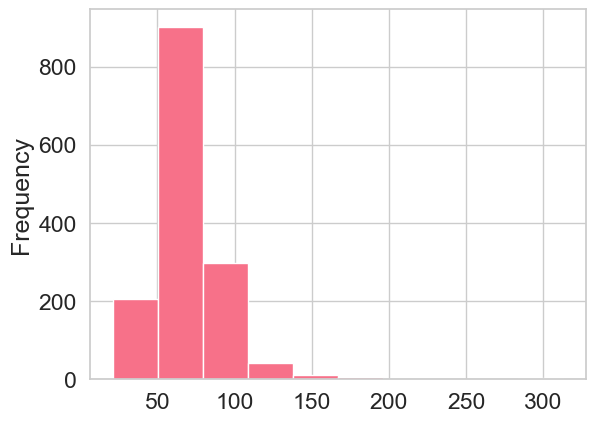

In [109]:
df['LotFrontage'].plot.hist();

In [110]:
df['GarageYrBlt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageYrBlt
Non-Null Count  Dtype  
--------------  -----  
1379 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [111]:
df['GarageYrBlt'].min(), df['GarageYrBlt'].max()

(1900.0, 2010.0)

In [112]:
df[cols].head()

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0     208500            7       1710           2         548          856   
1     181500            6       1262           2         460         1262   
2     223500            7       1786           2         608          920   
3     140000            7       1717           3         642          756   
4     250000            8       2198           3         836         1145   

   1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  
0       856         2             8       2003  
1      1262         2             6       1976  
2       920         2             6       2001  
3       961         1             7       1915  
4      1145         2             9       2000

In [113]:
df['GarageYrBlt'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: GarageYrBlt, Length: 1460, dtype: bool

In [114]:
df['GarageYrBlt'].nunique()

97

In [115]:
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [116]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

## Fill `GarageYrBlt` missing data using `Regression`

In [117]:
df.select_dtypes(include=np.number).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [118]:
fmd = df.select_dtypes(include=np.number)

In [119]:
test = fmd[fmd['GarageYrBlt'].isna()]
train = fmd.dropna()

In [120]:
train.shape, test.shape

((1371, 38), (81, 38))

**Preparing data**

In [121]:
X_train = train.drop(['GarageYrBlt'], axis=1)
y_train = train['GarageYrBlt']
X_test = test.drop(['GarageYrBlt'], axis=1)

In [122]:
# Getting ready a model to predict missing values(GarageYrBlt column)
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 0)
logistic.fit(X_train, y_train)

LogisticRegression(random_state=0)

- **Predicting the test data**

In [123]:
y_pred = logistic.predict(X_test)

After predicting the test data below, the code represents replacing the missing data with predicted values.

Checking the results

In [124]:
y_pred

array([1977., 2005., 1977., 1977., 1977., 1977., 1977., 1977., 2005.,
       1977., 2005., 1966., 2005., 1977., 2005., 2005., 2005., 1977.,
       1977., 2005., 1977., 1958., 1977., 1977., 1977., 2005., 1977.,
       1977., 1965., 1977., 1977., 1958., 1977., 1966., 1977., 2005.,
       2005., 1966., 2006., 1977., 1977., 2005., 1977., 1977., 1977.,
       1977., 2005., 2005., 2005., 1977., 2005., 1977., 1977., 1958.,
       1977., 1977., 2005., 1977., 2005., 2005., 2005., 1977., 1966.,
       1977., 1977., 1977., 1977., 1977., 2005., 1977., 2005., 1977.,
       1977., 1977., 2005., 1977., 2005., 1977., 2005., 1977., 1965.])

In [125]:
print(df.GarageYrBlt.isna().sum(), "missing values")

81 missing values


In [126]:
df.loc[df['GarageYrBlt'].isnull(), 'GarageYrBlt'] = y_pred

In [127]:
print("After imputation")
print(df.GarageYrBlt.isna().sum(), "missing values")

After imputation
0 missing values


In [128]:
#missing data
exist = df.count().sort_values(ascending=True)
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False))
missing_data = pd.concat([exist, total, percent], axis=1, keys=['Only Excist','Missing', 'Percent of Missing'])
missing_data.head(20)

Only Excist  Missing  Percent of Missing
MasVnrArea           1452        8            0.005479
Electrical           1459        1            0.000685
GarageType           1460        0            0.000000
FireplaceQu          1460        0            0.000000
Fireplaces           1460        0            0.000000
Functional           1460        0            0.000000
TotRmsAbvGrd         1460        0            0.000000
KitchenQual          1460        0            0.000000
KitchenAbvGr         1460        0            0.000000
Id                   1460        0            0.000000
HalfBath             1460        0            0.000000
FullBath             1460        0            0.000000
BsmtHalfBath         1460        0            0.000000
BsmtFullBath         1460        0            0.000000
GrLivArea            1460        0            0.000000
LowQualFinSF         1460        0            0.000000
2ndFlrSF             1460        0            0.000000
1stFlrSF             1460        0            0.000000
GarageYrBlt          1460        0            0.000000
BedroomAbvGr         1460        0            0.000000

In [129]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [130]:
df['MasVnrArea'].min() , df['MasVnrArea'].max() , df['MasVnrArea'].mean()

(0.0, 1600.0, 103.68526170798899)

I think this feature is zero\
and my guess is True\
***Yeeeeeeeeeeeeeeeeeeeeeeeeeees***

In [131]:
df[df['MasVnrType']=='nomasvnr']['MasVnrArea']

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

In [132]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [133]:
#missing data
exist = df.count().sort_values(ascending=True)
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False))
missing_data = pd.concat([exist, total, percent], axis=1, keys=['Only Excist','Missing', 'Percent of Missing'])
missing_data.head(20)

Only Excist  Missing  Percent of Missing
Electrical           1459        1            0.000685
Id                   1460        0            0.000000
FireplaceQu          1460        0            0.000000
Fireplaces           1460        0            0.000000
Functional           1460        0            0.000000
TotRmsAbvGrd         1460        0            0.000000
KitchenQual          1460        0            0.000000
KitchenAbvGr         1460        0            0.000000
BedroomAbvGr         1460        0            0.000000
HalfBath             1460        0            0.000000
FullBath             1460        0            0.000000
BsmtHalfBath         1460        0            0.000000
BsmtFullBath         1460        0            0.000000
GrLivArea            1460        0            0.000000
LowQualFinSF         1460        0            0.000000
2ndFlrSF             1460        0            0.000000
1stFlrSF             1460        0            0.000000
GarageType           1460        0            0.000000
GarageYrBlt          1460        0            0.000000
GarageFinish         1460        0            0.000000

In [134]:
df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [135]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [136]:
df[df['Electrical'].isna()].columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [137]:
df[df['Electrical'].isna()]['Fence']

1379    nofence
Name: Fence, dtype: object

In [138]:
td = pd.read_csv('file/test.csv')

In [139]:
td['Electrical'].value_counts()

SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64

In [140]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [141]:
df['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [142]:
df['Electrical'].isna().sum()

0

In [143]:
#missing data
exist = df.count().sort_values(ascending=True)
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False))
missing_data = pd.concat([exist, total, percent], axis=1, keys=['Only Excist','Missing', 'Percent of Missing'])
missing_data.head(20)

Only Excist  Missing  Percent of Missing
Id                   1460        0                 0.0
FireplaceQu          1460        0                 0.0
Fireplaces           1460        0                 0.0
Functional           1460        0                 0.0
TotRmsAbvGrd         1460        0                 0.0
KitchenQual          1460        0                 0.0
KitchenAbvGr         1460        0                 0.0
BedroomAbvGr         1460        0                 0.0
GarageType           1460        0                 0.0
HalfBath             1460        0                 0.0
BsmtHalfBath         1460        0                 0.0
BsmtFullBath         1460        0                 0.0
GrLivArea            1460        0                 0.0
LowQualFinSF         1460        0                 0.0
2ndFlrSF             1460        0                 0.0
1stFlrSF             1460        0                 0.0
Electrical           1460        0                 0.0
FullBath             1460        0                 0.0
GarageYrBlt          1460        0                 0.0
GarageFinish         1460        0                 0.0

In [144]:
df.to_csv('file/train_no_miss.csv',index=False)

In [145]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  noalley      Reg   
1   2          20       RL         80.0     9600   Pave  noalley      Reg   
2   3          60       RL         68.0    11250   Pave  noalley      IR1   
3   4          70       RL         60.0     9550   Pave  noalley      IR1   
4   5          60       RL         84.0    14260   Pave  noalley      IR1   

  LandContour Utilities  ... PoolArea  PoolQC    Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0  NoPool  nofence        None       0   
1         Lvl    AllPub  ...        0  NoPool  nofence        None       0   
2         Lvl    AllPub  ...        0  NoPool  nofence        None       0   
3         Lvl    AllPub  ...        0  NoPool  nofence        None       0   
4         Lvl    AllPub  ...        0  NoPool  nofence        None       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [146]:
df = pd.read_csv('file/train_no_miss.csv')

In [147]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  noalley      Reg   
1   2          20       RL         80.0     9600   Pave  noalley      Reg   
2   3          60       RL         68.0    11250   Pave  noalley      IR1   
3   4          70       RL         60.0     9550   Pave  noalley      IR1   
4   5          60       RL         84.0    14260   Pave  noalley      IR1   

  LandContour Utilities  ... PoolArea  PoolQC    Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0  NoPool  nofence        None       0   
1         Lvl    AllPub  ...        0  NoPool  nofence        None       0   
2         Lvl    AllPub  ...        0  NoPool  nofence        None       0   
3         Lvl    AllPub  ...        0  NoPool  nofence        None       0   
4         Lvl    AllPub  ...        0  NoPool  nofence        None       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

<b> 1- Proplem and Explore Data with `pandas` `numpy` **✔️**</b>\
<b> 2 - [Exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)     **(EDA)** **✔️**</b>\
<b> 3 - [Feature Engineering :](https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10)</b>
   * **Imputation** **✔️**
   * **Handling Outliers**
   * **Log Transform**
   * **Encoding**
   * **Scaling**
   * **Normalization** 
   * **Standardization.**
  

## Now Lets Try Something Else

*******First make a logistic regression model and see score before handled outliers*******

In [148]:
from sklearn import preprocessing

In [149]:
def prepare_data_to_model(data):
    for i in  data:
    #     print(i)
        if data[i].dtype == object:
            data[i] = data[i].astype('category')
            
            le = preprocessing.LabelEncoder()
            le.fit(df[i])
            data[i] = le.transform(data[i])
    return data

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
from sklearn.model_selection import train_test_split

In [325]:
clf = RandomForestRegressor()

In [326]:
clf.fit(X_train,y_train)

RandomForestRegressor()

In [327]:
clf.score(X_test,y_test)

0.8347074964851148

In [332]:
np.expm1(clf.predict(X_test)).min(), np.expm1(clf.predict(X_test)).max()

(1626.066758309045, 3940.8984777855185)

In [337]:
pd.Series(np.expm1(clf.predict(X_test))).describe()

count     292.000000
mean     2553.551030
std       395.111194
min      1626.066758
25%      2258.310465
50%      2476.197095
75%      2767.940294
max      3940.898478
dtype: float64

In [152]:
def model_data(data):
    X = data.drop('SalePrice',axis=1)
    y = data['SalePrice']
    
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
    
    log = LogisticRegression()
    log.fit(X_train,y_train)
    print(log.score(X_test,y_test))

In [153]:
df = prepare_data_to_model(df)

In [154]:
model_data(df)

0.00684931506849315


In [155]:
model_data(df[cols])

0.0136986301369863


wooh look to our data now lets handled outlires

# Handling Outliers

In [156]:
sns.set_palette('Set2',9,1) 
sns.set()

In [257]:
df = pd.read_csv('file/train_no_miss.csv')

In [158]:
df.skew().sort_values(ascending=False)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.677616
LotFrontage       2.384950
OpenPorchSF       2.364342
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
G

# SalePrice `The Target`

In [159]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [160]:
df.SalePrice.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [161]:
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])

In [162]:
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 180921.20 and sigma = 79415.29



In [163]:
df['SalePrice'].min(), df['SalePrice'].max(), df['SalePrice'].mean()

(34900, 755000, 180921.19589041095)

Text(0.5, 1.0, 'SalePrice distribution')

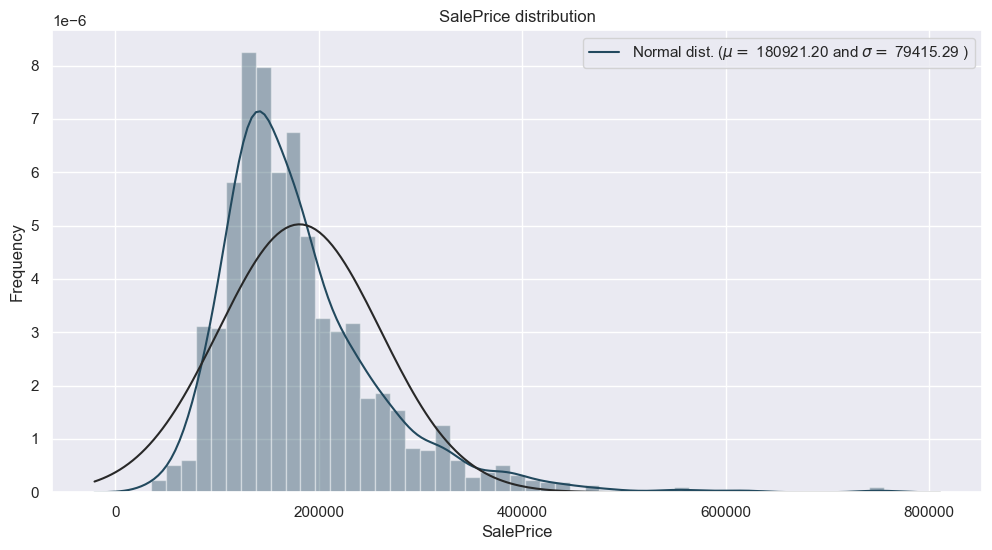

In [164]:
f, ax = plt.subplots(figsize=(12,6))
plot = sns.distplot(df.SalePrice, kde=True,fit=norm,color='#22495e')
plot.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

In [165]:
sns.set_palette('Set2',9,1) 
sns.set()

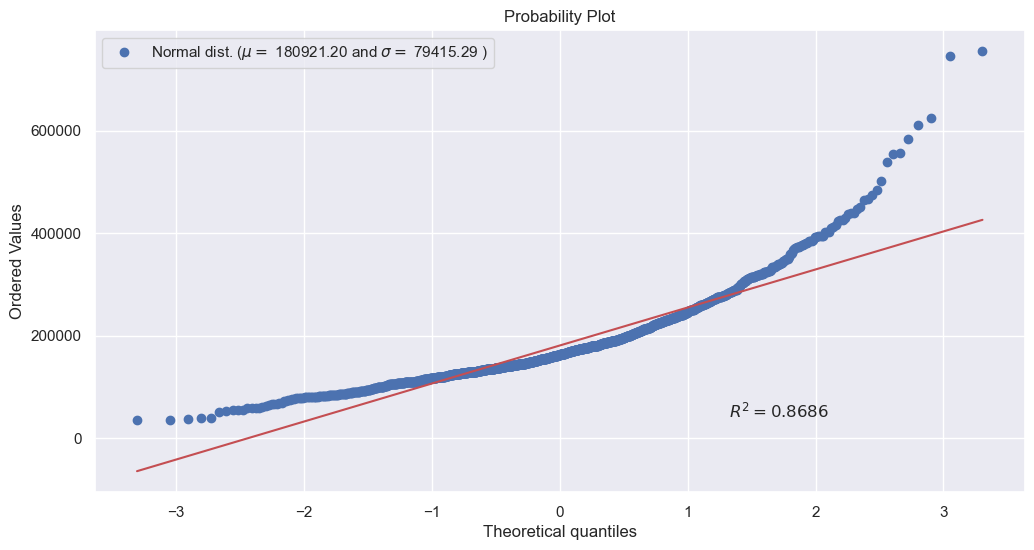

In [166]:
fig, ax = plt.subplots(figsize=(12,6))
res = stats.probplot(df['SalePrice'],  plot=ax,rvalue=True)
ax.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
# plt.show()

In [167]:
np.log1p(df["SalePrice"])

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [258]:
log_sale = df.SalePrice.apply(np.log10)
root_age = df.SalePrice.apply(np.sqrt)

crm_boxcox = stats.boxcox(df['SalePrice'])[0]
crm_boxcox = pd.Series(crm_boxcox)

Text(0, 0.5, 'Frequency')

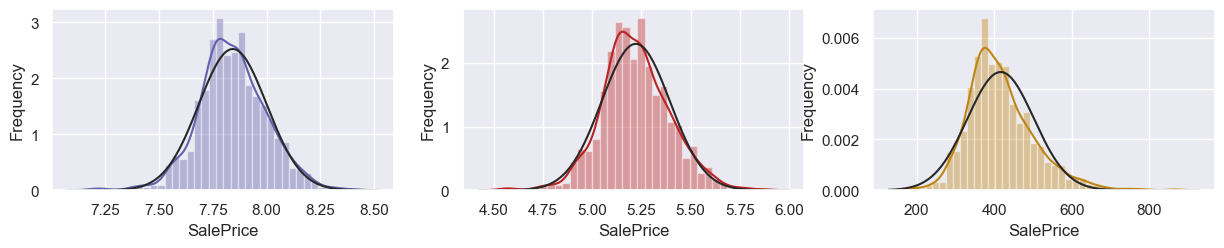

In [197]:
fig, ax = plt.subplots(figsize=(15,8))
plt.subplot(331)
sns.distplot(df.SalePrice, kde=True,fit=norm,color='#6361ac');
plt.ylabel('Frequency')
plt.subplot(332);
sns.distplot(log_sale, kde=True,fit=norm,color='#bb2222');
plt.ylabel('Frequency')
plt.subplot(333);
sns.distplot(root_age, kde=True,fit=norm,color='#bf8511');
plt.ylabel('Frequency')

In [262]:
log_sale.describe()

count    1460.000000
mean        5.221979
std         0.173480
min         4.542825
25%         5.113860
50%         5.212188
75%         5.330414
max         5.877947
Name: SalePrice, dtype: float64

In [266]:
root_age.describe() , df['SalePrice'].describe()

(count    1460.000000
 mean      416.617225
 std        85.769006
 min       186.815417
 25%       360.520452
 50%       403.732585
 75%       462.601340
 max       868.907360
 Name: SalePrice, dtype: float64,
 count      1460.000000
 mean     180921.195890
 std       79442.502883
 min       34900.000000
 25%      129975.000000
 50%      163000.000000
 75%      214000.000000
 max      755000.000000
 Name: SalePrice, dtype: float64)

In [267]:
log_sale.min(), log_sale.max(), df['SalePrice'].min(), df['SalePrice'].max()

(4.54282542695918, 5.8779469516291885, 34900, 755000)

Text(0, 0.5, 'Frequency')

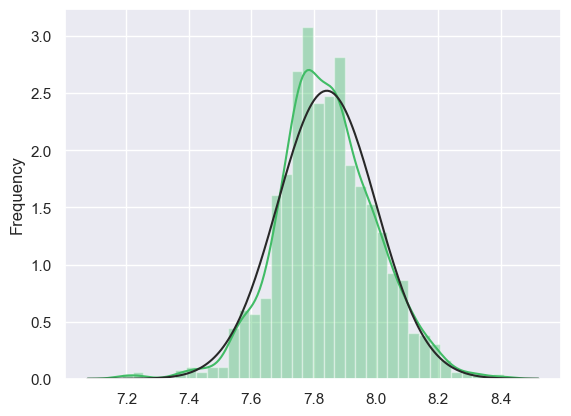

In [170]:
sns.distplot(crm_boxcox, kde=True,fit=norm,color='#41bc66');
plt.ylabel('Frequency')

In [171]:
df.SalePrice.skew()

1.8828757597682129

In [172]:
log_sale.skew()

0.12133506220521131

In [173]:
root_age.skew()

0.9431527373310963

In [174]:
crm_boxcox.skew()

-0.008652893640830044

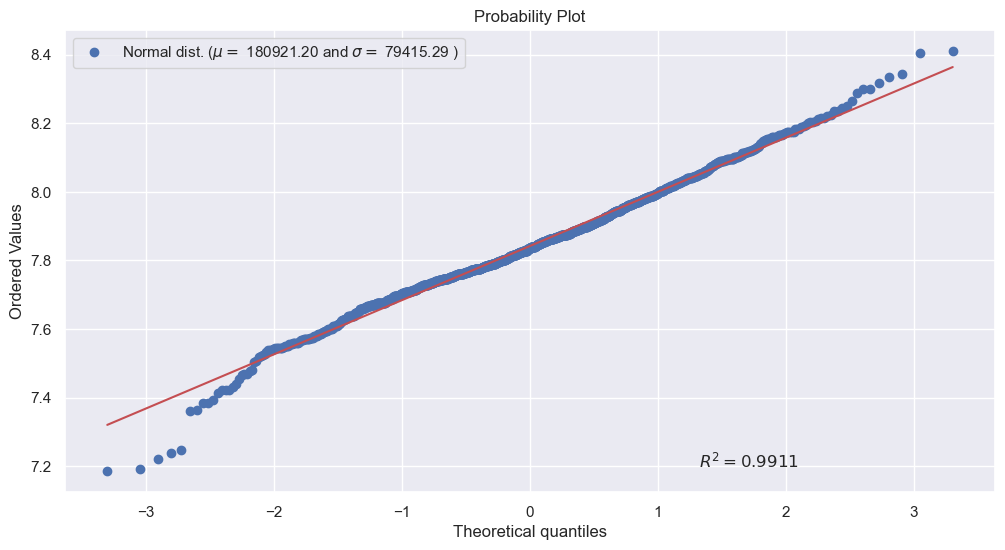

In [175]:
fig, ax = plt.subplots(figsize=(12,6))
res = stats.probplot(crm_boxcox,  plot=ax,rvalue=True)
ax.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
# plt.show()

In [176]:
crm_boxcox.describe()

count    1460.000000
mean        7.842252
std         0.158258
min         7.185702
25%         7.745006
50%         7.835733
75%         7.942749
max         8.410162
dtype: float64

Awasom its look very good now lets do some thing else\
Look Nice Now lets do some thing else

In [177]:
df['SalePrice'] = crm_boxcox

In [178]:
df[cols].skew().sort_values(ascending=False)

TotalBsmtSF     1.524255
1stFlrSF        1.376757
GrLivArea       1.366560
TotRmsAbvGrd    0.676341
OverallQual     0.216944
GarageArea      0.179981
FullBath        0.036562
SalePrice      -0.008653
GarageCars     -0.342549
YearBuilt      -0.613461
dtype: float64

Text(0.5, 1.0, 'TotalBsmtS distribution')

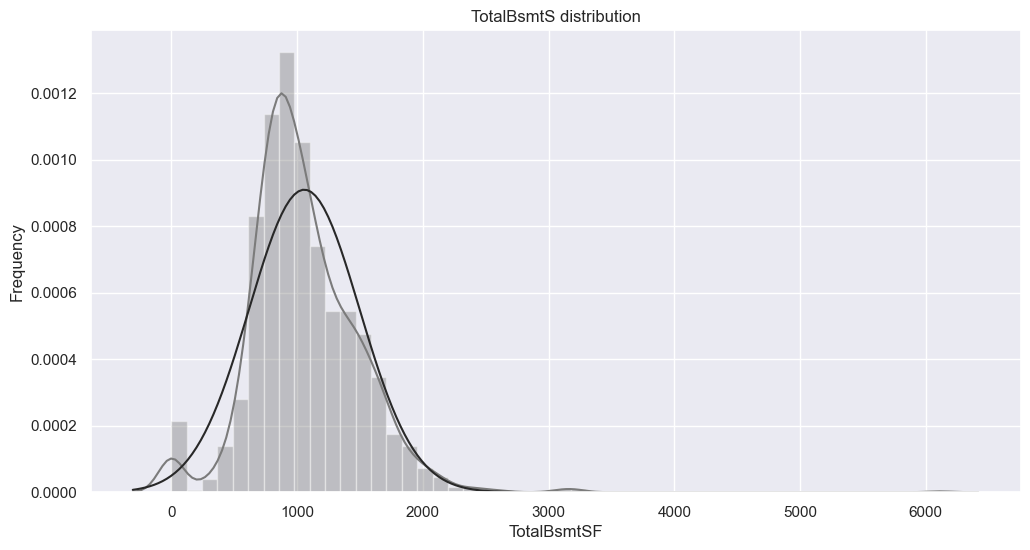

In [179]:
f, ax = plt.subplots(figsize=(12,6))
plot = sns.distplot(df.TotalBsmtSF, kde=True,fit=norm,color='#7b7b7b')
# plot.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('TotalBsmtS distribution')

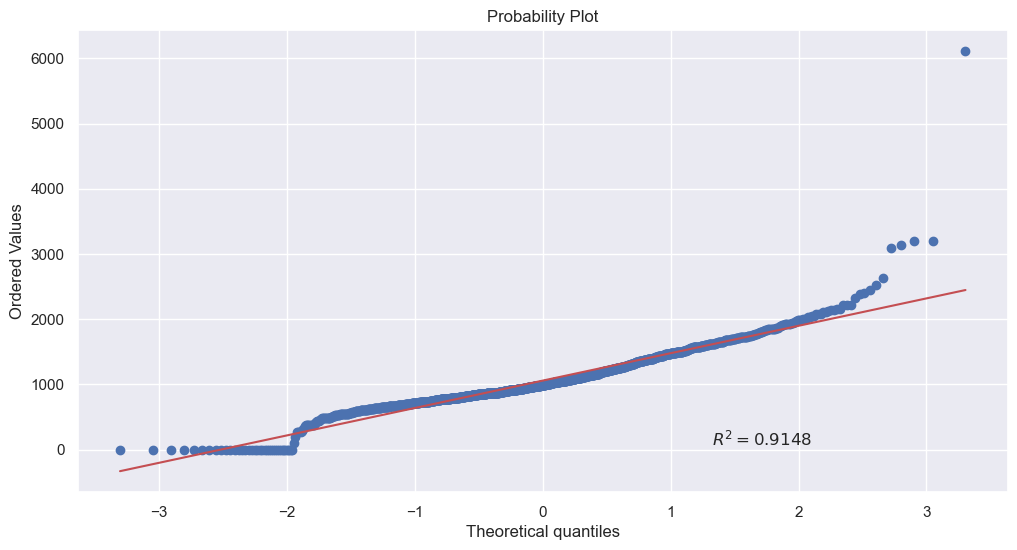

In [180]:
fig, ax = plt.subplots(figsize=(12,6))
res = stats.probplot(df.TotalBsmtSF,  plot=ax,rvalue=True)
# ax.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')

In [181]:
df['1stFlrSF'].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

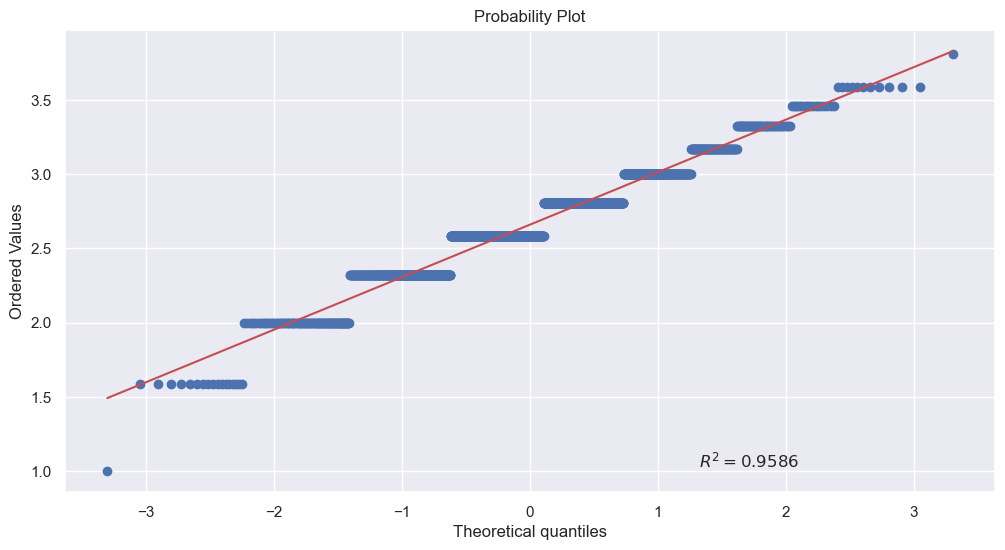

In [182]:
fig, ax = plt.subplots(figsize=(12,6))
res = stats.probplot(x=df['TotRmsAbvGrd'].apply(np.log2),  plot=ax,rvalue=True)

In [183]:
df['1stFlrSF'] = df['1stFlrSF'].apply(np.log10)
df.GrLivArea = df.GrLivArea.apply(np.log10)

In [210]:
df[cols].skew().sort_values(ascending=False)

TotalBsmtSF     1.524255
TotRmsAbvGrd    0.676341
OverallQual     0.216944
GarageArea      0.179981
1stFlrSF        0.079157
FullBath        0.036562
GrLivArea      -0.006995
SalePrice      -0.008653
GarageCars     -0.342549
YearBuilt      -0.613461
dtype: float64

Now lets model using Logistic Regrision

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [186]:
for i in  df:
#     print(i)
    if df[i].dtype == object:
        df[i] = df[i].astype('category')

        le = preprocessing.LabelEncoder()
        le.fit(df[i])
        df[i] = le.transform(df[i])

In [187]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [216]:
df[cols].skew().sort_values(ascending=False)

TotalBsmtSF     1.524255
TotRmsAbvGrd    0.676341
OverallQual     0.216944
GarageArea      0.179981
1stFlrSF        0.079157
FullBath        0.036562
GrLivArea      -0.006995
SalePrice      -0.008653
GarageCars     -0.342549
YearBuilt      -0.613461
dtype: float64

In [217]:
df[cols]

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0      7.932610            7   3.232996           2         548          856   
1      7.878263            6   3.101059           2         460         1262   
2      7.959618            7   3.251881           2         608          920   
3      7.774955            7   3.234770           3         642          756   
4      8.002875            8   3.342028           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455   7.863875            6   3.216694           2         460          953   
1456   7.935404            6   3.316599           2         500         1542   
1457   8.027382            7   3.369216           1         252         1152   
1458   7.781006            5   3.032619           1         240         1078   
1459   7.795887            5   3.098990           1         276         1256   

      1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  
0     2.932474         2             8       2003  
1     3.101059         2             6       1976  
2     2.963788         2             6       2001  
3     2.982723         1             7       1915  
4     3.058805         2             9       2000  
...        ...       ...           ...        ...  
1455  2.979093         2             7       1999  
1456  3.316599         2             7       1978  
1457  3.074816         2             9       1941  
1458  3.032619         1             5       1950  
1459  3.098990         1             6       1965  

[1460 rows x 10 columns]

In [218]:
df[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   int64  
 2   GrLivArea     1460 non-null   float64
 3   GarageCars    1460 non-null   int64  
 4   GarageArea    1460 non-null   int64  
 5   TotalBsmtSF   1460 non-null   int64  
 6   1stFlrSF      1460 non-null   float64
 7   FullBath      1460 non-null   int64  
 8   TotRmsAbvGrd  1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 114.2 KB


In [219]:
X = df[cols].drop('SalePrice',axis=1)
y = df[cols]['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [220]:
log = LogisticRegression()

In [275]:
log.fit(X_train,y_train.round())

LogisticRegression()

In [282]:
log.score(X_test,y_test.round())

0.9691780821917808

In [280]:
print(classification_report(y_test.round(),log.predict(X_test)))

              precision    recall  f1-score   support

         7.0       1.00      0.10      0.18        10
         8.0       0.97      1.00      0.98       282

    accuracy                           0.97       292
   macro avg       0.98      0.55      0.58       292
weighted avg       0.97      0.97      0.96       292



In [274]:
train_X = np.array([
    [100, 1.1, 0.8],  
    [200, 1.0, 6.5],  
    [150, 1.3, 7.1],  
    [120, 1.2, 3.0],  
    [100, 1.1, 4.0],  
    [150, 1.2, 6.8],
])
train_Y = np.array([14.0, 26.1, 56, 7.8, 1.9, 4.5])
train_Y.round
clf = LogisticRegression()
# clf.fit(train_X, train_Y)
print(train_Y.round())

[14. 26. 56.  8.  2.  4.]


In [230]:
label_encoder = preprocessing.LabelEncoder()
train_Y = label_encoder.fit_transform(train_Y)

In [231]:
train_Y

array([3, 4, 5, 2, 0, 1], dtype=int64)

In [240]:
label_encoder.fit_transform(y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'nunique'

In [256]:
df[cols]['SalePrice'].describe()

count    1460.000000
mean        7.842252
std         0.158258
min         7.185702
25%         7.745006
50%         7.835733
75%         7.942749
max         8.410162
Name: SalePrice, dtype: float64

In [283]:
sub = pd.read_csv('kagle_submiton.csv')

In [284]:
sub['Sale']

Id      SalePrice
0     1461  120681.126679
1     1462  159204.890607
2     1463  186522.943076
3     1464  195720.655862
4     1465  191830.708344
...    ...            ...
1454  2915   84106.421819
1455  2916   82376.003955
1456  2917  169534.781459
1457  2918  116002.552179
1458  2919  222140.695594

[1459 rows x 2 columns]

In [285]:
sub['SalePrice'].head()

0    120681.126679
1    159204.890607
2    186522.943076
3    195720.655862
4    191830.708344
Name: SalePrice, dtype: float64

In [288]:
sub['SalePrice'].round().head()

0    120681.0
1    159205.0
2    186523.0
3    195721.0
4    191831.0
Name: SalePrice, dtype: float64

In [289]:
sub['SalePrice'] = sub['SalePrice'].round()

In [290]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [295]:
sub['SalePrice'] = sub['SalePrice'].astype(np.int64)

In [296]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         1459 non-null   int64
 1   SalePrice  1459 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


In [297]:
sub.head()

Id  SalePrice
0  1461     120681
1  1462     159205
2  1463     186523
3  1464     195721
4  1465     191831

In [299]:
sub.to_csv('sub1.csv',index=False)